In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats,signal
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from textwrap import wrap
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

import os

from PlottingScripts import CV, Spline, Tune1, distVar, distplot_wratio, StackedHisto, SimpleHisto, mcplot, DrawMatrix

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.22/02


In [85]:
datafolder = '../../rootFiles/1mu1p_selection'
auxfolder = '../aux'
tag = '2021-01-20'
plotfolder = '../outputs/PlotDumps'+tag
covfolder = '../outputs/covMatrix'+tag
covtag = 'frac_covar_run3_%s'%tag



RSE  = ['run','subrun','event']

# RUN 3 

In [89]:
run = 'run3'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','LYRayleigh','SCE','wiremodThetaYZ','wiremodThetaXZ']
for name in names:
    s_detsyslist.append(name)
'''
s_detsyslist.append('wiremodX')
#f_scaleslist.append(1.30915319237e+21) #POT

s_detsyslist.append('wiremodYZ')
#f_scaleslist.append(1.31097060608e+21) #POT

s_detsyslist.append('recomb')
f_scaleslist.append(6.3706245518e+20)

s_detsyslist.append('LYdown')
#f_scaleslist.append(1.21808316832e+21)

s_detsyslist.append('LYRayleigh')
#f_scaleslist.append(1.30830317061e+21)

s_detsyslist.append('SCE')
f_scaleslist.append(5.89862945464e+20)

s_detsyslist.append('wiremodThetaYZ')
#f_scaleslist.append(1.26402704519e+21)

s_detsyslist.append('wiremodThetaXZ')
#f_scaleslist.append(1.29697772584e+21)
'''

#df_cv = pd.read_parquet('../../data/pickles/detsys_CV_run3_nodupesMay1.parquet')
#scaleCV = 9.65858292241e+19 

a_df_sys = []

RSE = ['run','subrun','event']
i=0
for sys in s_detsyslist:
#    print('111')
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
    if i==0:
        print(df_sys)
    i+=1
    a_df_sys.append(df_sys)
#    print(df_sys.shape[0])

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))


       Proton_CosTheta  Lepton_CosTheta  MPID_pion  MPID_gamma  MPID_proton  \
0             0.975623        -0.270942   0.208159    0.017922     0.941928   
1             0.977997        -0.262729   0.161487    0.024317     0.968520   
3             0.917650        -0.385812   0.757044    0.055025     0.997779   
5             0.679131         0.697366   0.804137    0.084645     0.911533   
8             0.951146        -0.408730   0.712495    0.042955     0.997503   
...                ...              ...        ...         ...          ...   
26988         0.916610        -0.067103   0.802907    0.109758     0.946799   
26990         0.908083         0.022669   0.785453    0.479100     0.951993   
26991         0.673420        -0.927854   0.708916    0.164217     0.220441   
26992         0.781234        -0.933200   0.124697    0.551773     0.821456   
26993         0.904325         0.099290   0.722686    0.064603     0.951993   

       MPID_muon  MPID_eminus  PassPrecuts1m1p    r

# Run1

In [4]:
# Make big list of variables with their accompanying ranges so we can just dump a buttload of plots
#varlistSel = {}

varListSel = {}
varListSel['Xreco'] = distVar('Xreco',(15,241.25),'Reco Vertex X',datafolder+'/'+covfolder+'/'+covtag+'__x_reco.txt')
varListSel['Yreco'] = distVar('Yreco',(-101.5,101.5),'Reco Vertex Y',datafolder+'/'+covfolder+'/'+covtag+'__y_reco.txt')
varListSel['Zreco'] = distVar('Zreco',(15,1021.8),'Reco Vertex Z',datafolder+'/'+covfolder+'/'+covtag+'__z_reco.txt')
varListSel['OpenAng'] = distVar('OpenAng',(.6,2.8),'Opening Angle (rads)',datafolder+'/'+covfolder+'/'+covtag+'__openang_reco.txt')
varListSel['Thetas'] = distVar('Thetas',(0,np.pi),r'Sum of Thetas ($\theta_{p} + \theta_{\mu}$) (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_thetas_reco.txt')
varListSel['Phis'] = distVar('Phis',(1.5,4),r'Difference of Phis ($|\phi_{p} - \phi_{\mu}|$)  (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_phis_reco.txt')
varListSel['ChargeNearTrunk'] = distVar('ChargeNearTrunk',(0,600),'ADC Charge within 5cm of Reco Vertex',datafolder+'/'+covfolder+'/'+covtag+'__charge_near_trunk_reco.txt')
varListSel['Enu_1m1p'] = distVar('Enu_1m1p',(200,1200),'Reconstructed Neutrino Energy (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__nu_energy_reco.txt')
varListSel['PhiT_1m1p'] = distVar('PhiT_1m1p',(0,1),r'$\phi_T$',datafolder+'/'+covfolder+'/'+covtag+'__phiT_reco.txt')
varListSel['AlphaT_1m1p'] = distVar('AlphaT_1m1p',(0,np.pi),r'$\alpha_T$',datafolder+'/'+covfolder+'/'+covtag+'__alphaT_reco.txt')
varListSel['PT_1m1p'] = distVar('PT_1m1p',(0,320),r'$p_T$',datafolder+'/'+covfolder+'/'+covtag+'__pT_reco.txt')
varListSel['PTRat_1m1p'] = distVar('PTRat_1m1p',(0,.4),r'$p_T/|p|$',datafolder+'/'+covfolder+'/'+covtag+'__pT_ratio_reco.txt')
varListSel['BjXB_1m1p'] = distVar('BjXB_1m1p',(.2,1.8),'Bjorken X*',datafolder+'/'+covfolder+'/'+covtag+'__BjxB_reco.txt')
varListSel['BjYB_1m1p'] = distVar('BjYB_1m1p',(0.05,.75),'Bjorken Y*',datafolder+'/'+covfolder+'/'+covtag+'__BjyB_reco.txt')
varListSel['Q2_1m1p'] = distVar('Q2_1m1p',(0,6e5),r'$Q^2$',datafolder+'/'+covfolder+'/'+covtag+'__Q2_reco.txt')
varListSel['SphB_1m1p'] = distVar('SphB_1m1p',(0,1000),'QE Consistency*',datafolder+'/'+covfolder+'/'+covtag+'__sphB_reco.txt')
varListSel['Q0_1m1p'] = distVar('Q0_1m1p',(70,600),r'$Q_0$',datafolder+'/'+covfolder+'/'+covtag+'__Q0_reco.txt')
varListSel['Q3_1m1p'] = distVar('Q3_1m1p',(200,1000),r'$Q_3$',datafolder+'/'+covfolder+'/'+covtag+'__Q3_reco.txt')
varListSel['Lepton_PhiReco'] = distVar('Lepton_PhiReco',(-np.pi,np.pi),r'Muon $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_phi_reco.txt')
varListSel['Lepton_ThetaReco'] = distVar('Lepton_ThetaReco',(.2,2.8),r'Muon $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_theta_reco.txt')
varListSel['Lepton_TrackLength'] = distVar('Lepton_TrackLength',(20,200),'Muon Track Length (cm)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_length_reco.txt')
varListSel['Muon_Edep'] = distVar('Muon_Edep',(50,600),'Reco Muon Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_KE_reco.txt')
varListSel['Proton_PhiReco'] = distVar('Proton_PhiReco',(-np.pi,np.pi),r'Proton $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__proton_phi_reco.txt')
varListSel['Proton_ThetaReco'] = distVar('Proton_ThetaReco',(0,2),r'Proton $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__proton_theta_reco.txt')
varListSel['Proton_TrackLength'] = distVar('Proton_TrackLength',(5,100),'Proton Track Length',datafolder+'/'+covfolder+'/'+covtag+'__proton_length_reco.txt')
varListSel['Proton_Edep'] = distVar('Proton_Edep',(50,500),'Reco Proton Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__proton_KE_reco.txt')
varListSel['Proton_CosTheta'] = distVar('Proton_CosTheta',(0,1),'Proton Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__proton_cos_theta_reco.txt')
varListSel['Lepton_CosTheta'] = distVar('Lepton_CosTheta',(-1,1),'Muon Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__lepton_cos_theta_reco.txt')
varListSel['MPID_eminus'] = distVar('MPID_eminus',(0,1),'Eminus MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_eminus_score.txt')
varListSel['MPID_muon'] = distVar('MPID_muon',(0,1),'Muon MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_muon_score.txt')
varListSel['MPID_proton'] = distVar('MPID_proton',(0,1),'Proton MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_proton_score.txt')
varListSel['MPID_gamma'] = distVar('MPID_gamma',(0,1),'Gamma MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_gamma_score.txt')
varListSel['MPID_pion'] = distVar('MPID_pion',(0,1),'Pion MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_pion_score.txt')



In [5]:
a_cv_sys = []
a_overlap_sys = []
for df in a_df_sys:
    #df.insert(0,'bdt_run3_cosmic',bdt_run3_cosmic.predict_proba(df[myvars].values.tolist())[:,0])
    #df.insert(0,'bdt_run3_nu',bdt_run3_nu.predict_proba(df[myvars].values.tolist())[:,0])
#    df.insert(0,'bkgBDT_run3',bkgBDT_run3.predict_proba(df[myvars].values.tolist())[:,0])
#    df.insert(0,'bkgBDT_run3_cv',bkgBDT_run3.predict_proba(df[myvars_cv].values.tolist())[:,0])
#    df.insert(0,'Lepton_CosTheta',np.cos(df['Lepton_ThetaReco'].values).tolist())
#    df.insert(0,'Proton_CosTheta',np.cos(df['Proton_ThetaReco'].values).tolist())
#    df.insert(0,'Lepton_CosTheta_cv',np.cos(df['Lepton_ThetaReco_cv'].values).tolist())
#    df.insert(0,'Proton_CosTheta_cv',np.cos(df['Proton_ThetaReco_cv'].values).tolist())
    a_cv_sys.append(df.sort_values('BDTscore_1mu1p_nu',ascending=True).drop_duplicates(RSE).sort_index().query('Enu_1m1p > 0'))
    a_overlap_sys.append(df.sort_values('BDTscore_1mu1p_nu',ascending=True).drop_duplicates(RSE).sort_index().query('Enu_1m1p > 0'))
    
#df_numu_run3_presel.insert(0,'bdt_run3_cosmic',bdt_run3_cosmic.predict_proba(df_numu_run3_presel[myvars].values.tolist())[:,0])
#df_numu_run3_presel.insert(0,'bdt_run3_nu',bdt_run3_nu.predict_proba(df_numu_run3_presel[myvars].values.tolist())[:,0])
       
#df_cv.insert(0,'bdt_run3_cosmic',bdt_run3_cosmic.predict_proba(df_cv[myvars].values.tolist())[:,0])
#df_cv.insert(0,'bdt_run3_nu',bdt_run3_nu.predict_proba(df_cv[myvars].values.tolist())[:,0])
#df_cv.insert(0,'bkgBDT_run3',bkgBDT_run3.predict_proba(df_cv[myvars].values.tolist())[:,0])
#df_cv.insert(0,'Lepton_CosTheta_cv',np.cos(df_cv['Lepton_ThetaReco'].values).tolist())
#df_cv.insert(0,'Proton_CosTheta_cv',np.cos(df_cv['Proton_ThetaReco'].values).tolist())

    

In [6]:
###################### Not Importnat ##################33

# Dump the detsys array for easier cov calculation
pickle.dump((a_overlap_sys,a_cv_sys,s_detsyslist),open("../../data/CovMatrices/detsyspack_jul2.pickle", "wb" ),protocol=2)

# Build Covariance Matrices!

In [5]:
# define cuts
Ecut = 'Enu_1m1p > 200'
precuts = 'PassPrecuts1m1p==1'
bdtcuts = 'BDTscore_1mu1p_nu < .4'
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'
#bdtcuts = 'bdt_run3_cosmic < .5 and bdt_run3_nu < .5'
s_cuts = bonuscuts + ' and ' + Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==False'
s_cuts_cv = bonuscuts + ' and '+ Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==True' 

nbins = 10

In [81]:
#Bring in the required modules
from scipy import *
from scipy import signal
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import lfilter
import scipy.signal
from scipy.optimize import leastsq
import pandas as pd
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from random import random




def smooth(cv_list,dv_list,xmin,xmax,dv_name,nbin=20):
    
#----------------------------------------------------------------
# This section is the CV
    cv = np.array(cv_list)
    dv = np.array(dv_list)

# throw away the data points outside of the hist limits to fake the real data
#    mask1 = np.logical_and(cv >= xmin, cv <= xmax)
#    cv = cv[mask1]
        
    cv_hist, binedges = np.histogram(cv, bins = nbin, range = (xmin, xmax))
    cv_hist= cv_hist+0.000001 # assure no zero bins    
    print('$$$$$$$$$$$$$$$$$$$$')
    print(cv_hist)
    print('!!!!!!!!!!!!!!!!!!!!')

#-------------------------------------------------------------------------------
# look for spikes at edges and remove them.  Smoothing cannot handle these.
    
    # flags for bin drops
    drop0=False
    dropn=False
    
    # throw away the first bin if needed
    # do this if the change is more than 80%
    print('cv[0] =  %f    cv[1] = %f  rat = %f'%(cv[0],cv[1],cv[0]/(cv[0]+cv[1])))

#    if ((cv_hist[0]/(cv_hist[0]+cv_hist[1]))>0.80):
#        drop0=True

    if ((cv_hist[nbin-1]/(cv_hist[nbin-2]+cv_hist[nbin-1]))>0.80):
        dropn=True


    # throw away the firstand/or last bin if needed
        
    if (drop0):    
        mask1 = np.logical_and(cv >= binedges[1], cv <= xmax)
        cv = cv[mask1]
        print('----------------------------drop0_cv')
        
    if (dropn):
        mask1 = np.logical_and(cv >= xmin, cv <=  binedges[nbin-1])
        cv = cv[mask1]
        print('dropn_cv')
    
        
    #-------------------------------------------------------------------------------
# CV smoothing, calculate the bandwidth for use throughout
        
        
# calculate Sheather/Jones bandwidth
    bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
    print('bwid = %f'%bwid)
    
    # This smoothing library wants 2d so pad it out
    cv2d=cv [:, np.newaxis]

    myrange = (lambda edges: (edges[:-1] + edges[1:])/2.0)(np.linspace(xmin,xmax,(10*nbin)+1))
    range2d=myrange [:, np.newaxis]
#    print(myrange)

#----------------------------------------------------------------
# This section is the detvar

#
# Create Fake data np.histograms,aiming for about 4000 events in the np.histogram
#
    # This smoothing library wants 2d so pad it out
    dv2d=dv [:, np.newaxis]
    dv_hist, binedges = np.histogram(dv, bins = nbin, range = (xmin, xmax))
    dv_hist= dv_hist+0.000001 # assure no zero bins    
    print('!!!!!!!!!!!!!!!!!!!!')
    print(dv_hist)
    print('!!!!!!!!!!!!!!!!!!!!')

    # throw away the firstand/or last bin if needed
        
    if (drop0):    
        mask1 = np.logical_and(dv >= binedges[1], dv <= xmax)
        dv = dv[mask1]
        print('-----------------------------------drop0_dv')

        
    if (dropn):
        mask1 = np.logical_and(dv >= xmin, dv <=  binedges[nbin-1])
        dv = dv[mask1]
        print('drop0_dv')
    
     
#----------------------------------------------------------------
# Smooth both CV AND DV, Fix up the edge bins.
         
    #get the CV smoothed case and normalize it
    gkdeCV= KernelDensity(kernel='epanechnikov', bandwidth=bwid).fit(cv2d)
    mykdeCV = np.exp(gkdeCV.score_samples(range2d))
    yhatCV=np.zeros(10*nbin)
#    yhatCV=(mykdeCV)*(cv.shape[0])/sum(mykdeCV)
    yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)

    #get the DV smoothed case and normalize it
    gkdeDV= KernelDensity(kernel='epanechnikov', bandwidth=bwid).fit(dv2d)
    mykdeDV = np.exp(gkdeDV.score_samples(range2d))

    yhatDV=np.zeros(10*nbin)
#    yhatDV=(mykdeDV)*dv.shape[0]/sum(mykdeDV)
    yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)

       
    # rebin the ratio into the bins we will use by summing the bin...
    smoothrat=np.zeros(nbin)
    smoothCV=np.zeros(nbin)
    smoothDV=np.zeros(nbin)

    k=0
    
    for j in range(nbin):
        ratvalCV=0.
        ratvalDV=0.
        for n in range(10):
            ratvalCV+=yhatCV[k]
            ratvalDV+=yhatDV[k]
            k+=1
        smoothrat[j]=ratvalDV/ratvalCV
        smoothCV[j]=ratvalCV
        smoothDV[j]=ratvalDV
    
    
        # put the first and/or last bin back if needed
    if (drop0):
        smoothrat[0]=dv_hist[0]/cv_hist[0]
    if (dropn):
        smoothrat[nbin-1]=dv_hist[nbin-1]/cv_hist[nbin-1]
    
    
    
    
    offset = (xmax - xmin )/(2*nbin)
    x= np.linspace(xmin+offset,xmax-offset,nbin)
    
    plt.plot(x, cv_hist, linewidth=1, linestyle="-", c="b",label='cv')  # smooth by filter
    plt.plot(x, dv_hist, linewidth=1, linestyle="-", c="g",label='dv')  # smooth by filter

    plt.plot(x, smoothCV, linewidth=1, linestyle="--", c="b",label='cv_smooth')  # smooth by filter

    plt.plot(x, smoothDV, linewidth=1, linestyle="--", c="g",label='dv_smooth')  # smooth by filter
    plt.legend()
    plt.title(dv_name)
    plt.savefig(plotfolder+'/detsys_%s_%s_%s_full_hists.png'%(dist.myname, run,dv_name),dpi=120,bbox_inches='tight')
    
    plt.show()
    
    
    plt.plot(x, dv_hist/cv_hist, linewidth=1, linestyle="-", c="b",label='original')  # smooth by filter
    plt.plot(x,smoothrat , linewidth=1, linestyle="-", c="m",label='smoothed')  # smooth by filter
    plt.legend()
    plt.title(dv_name)

    plt.savefig(plotfolder+'/detsys_%s_%s_%s_ratio.png'%(dist.myname, run,dv_name),dpi=120,bbox_inches='tight')

    plt.show()


    return(smoothCV,smoothDV)


9
0
$$$$$$$$$$$$$$$$$$$$
[  2.000001   3.000001   9.000001  14.000001  36.000001  41.000001
  74.000001 127.000001 190.000001 262.000001 333.000001 293.000001
 300.000001 246.000001 204.000001 226.000001 163.000001 115.000001
 122.000001  87.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1264.675878    cv[1] = 343.230682  rat = 0.786536
bwid = 288.907346
!!!!!!!!!!!!!!!!!!!!
[  3.000001   4.000001  20.000001  46.000001  61.000001  60.000001
 107.000001 144.000001 213.000001 285.000001 323.000001 329.000001
 329.000001 275.000001 242.000001 234.000001 190.000001 143.000001
 119.000001  96.000001]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


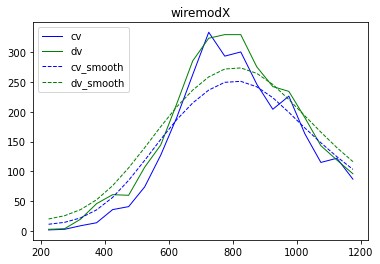

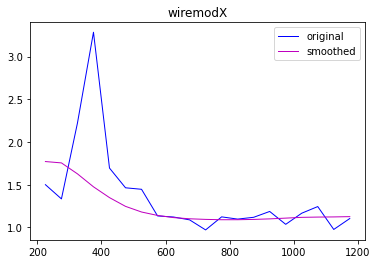

Enu_1m1p [0.33559637 0.32483405 0.241481   0.15298833 0.09000111 0.04853562
 0.02741125 0.01710472 0.01171906 0.00915689 0.00795675 0.00731705
 0.00734991 0.00791892 0.00896791 0.01055754 0.01229838 0.01293954
 0.01330289 0.01402917]
Enu_1m1p [2.50000000e-01 1.11111111e-01 1.49382716e+00 5.22448980e+00
 4.82253086e-01 2.14753123e-01 1.98867787e-01 1.79180358e-02
 1.46537396e-02 7.70642736e-03 9.01802704e-04 1.50962737e-02
 9.34444444e-03 1.38971512e-02 3.46981930e-02 1.25303469e-03
 2.74379916e-02 5.92816635e-02 6.04676162e-04 1.07015458e-02]


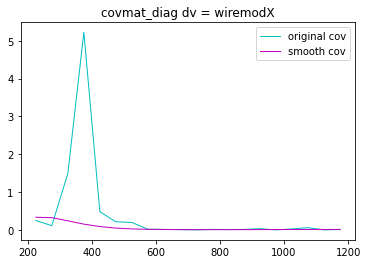

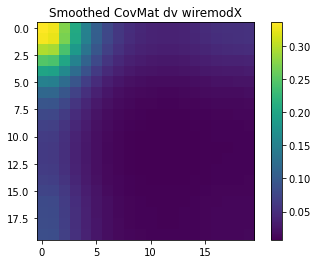

1
$$$$$$$$$$$$$$$$$$$$
[  2.000001   3.000001  11.000001  19.000001  43.000001  45.000001
  83.000001 127.000001 206.000001 282.000001 349.000001 291.000001
 308.000001 238.000001 219.000001 240.000001 162.000001 115.000001
 124.000001  89.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1264.675878    cv[1] = 343.230682  rat = 0.786536
bwid = 287.360844
!!!!!!!!!!!!!!!!!!!!
[  4.000001   6.000001  24.000001  35.000001  64.000001  68.000001
 110.000001 150.000001 220.000001 318.000001 352.000001 320.000001
 320.000001 264.000001 252.000001 255.000001 180.000001 146.000001
 128.000001 100.000001]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


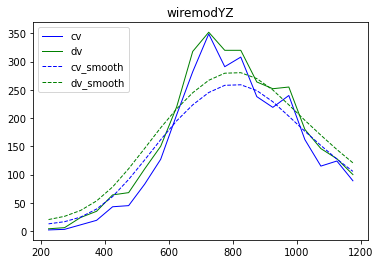

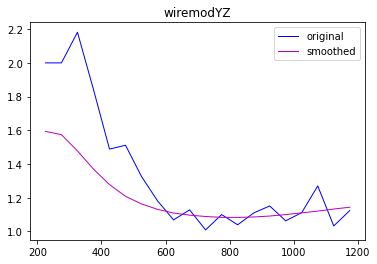

Enu_1m1p [0.22111241 0.20944014 0.15426189 0.09965353 0.06038133 0.03584582
 0.02274054 0.01512169 0.01067399 0.00844021 0.00715853 0.00638315
 0.00631    0.00670843 0.0075852  0.00900547 0.01088161 0.01291867
 0.01551002 0.0179177 ]
Enu_1m1p [1.00000000e+00 1.00000000e+00 1.39669421e+00 7.09141274e-01
 2.38507301e-01 2.61234568e-01 1.05820874e-01 3.27980656e-02
 4.61871995e-03 1.62969670e-02 7.38910190e-05 9.93138957e-03
 1.51796256e-03 1.19341854e-02 2.27059486e-02 3.90625000e-03
 1.23456790e-02 7.26654064e-02 1.04058273e-03 1.52758490e-02]


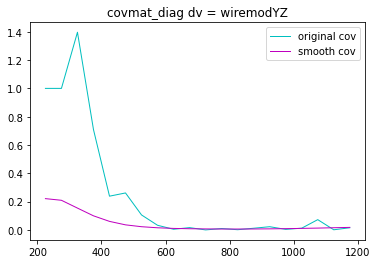

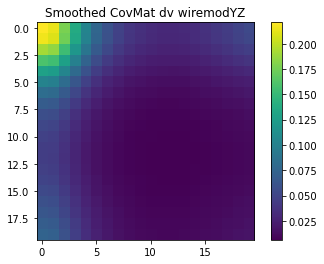

2
$$$$$$$$$$$$$$$$$$$$
[  2.000001   3.000001  11.000001  19.000001  43.000001  45.000001
  83.000001 127.000001 206.000001 282.000001 349.000001 291.000001
 308.000001 238.000001 219.000001 240.000001 162.000001 115.000001
 124.000001  89.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1264.675878    cv[1] = 343.230682  rat = 0.786536
bwid = 287.360844
!!!!!!!!!!!!!!!!!!!!
[  4.000001   6.000001  24.000001  35.000001  64.000001  68.000001
 110.000001 150.000001 220.000001 318.000001 352.000001 320.000001
 320.000001 264.000001 252.000001 255.000001 180.000001 146.000001
 128.000001 100.000001]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


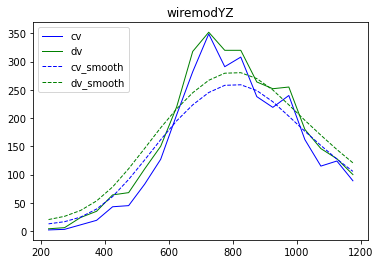

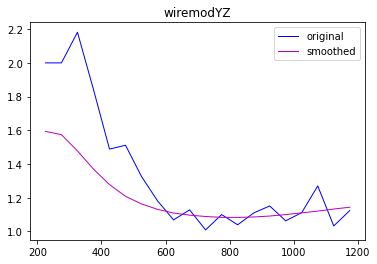

Enu_1m1p [0.22111241 0.20944014 0.15426189 0.09965353 0.06038133 0.03584582
 0.02274054 0.01512169 0.01067399 0.00844021 0.00715853 0.00638315
 0.00631    0.00670843 0.0075852  0.00900547 0.01088161 0.01291867
 0.01551002 0.0179177 ]
Enu_1m1p [1.00000000e+00 1.00000000e+00 1.39669421e+00 7.09141274e-01
 2.38507301e-01 2.61234568e-01 1.05820874e-01 3.27980656e-02
 4.61871995e-03 1.62969670e-02 7.38910190e-05 9.93138957e-03
 1.51796256e-03 1.19341854e-02 2.27059486e-02 3.90625000e-03
 1.23456790e-02 7.26654064e-02 1.04058273e-03 1.52758490e-02]


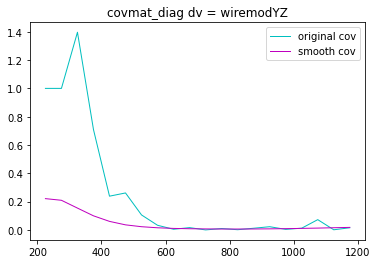

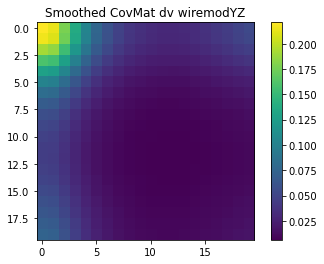

3
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 1.00000100e+00 1.50000010e+01 3.00000010e+01
 7.90000010e+01 1.22000001e+02 1.29000001e+02 1.59000001e+02
 1.70000001e+02 1.83000001e+02 1.82000001e+02 1.80000001e+02
 1.60000001e+02 1.35000001e+02 1.12000001e+02 1.14000001e+02
 9.30000010e+01 9.40000010e+01 7.10000010e+01 5.90000010e+01]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1037.957870    cv[1] = 561.236345  rat = 0.649051
bwid = 301.991901
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 1.00000100e+00 1.60000010e+01 4.00000010e+01
 8.40000010e+01 1.09000001e+02 1.38000001e+02 1.42000001e+02
 1.77000001e+02 1.78000001e+02 1.71000001e+02 1.72000001e+02
 1.61000001e+02 1.37000001e+02 1.19000001e+02 1.13000001e+02
 9.20000010e+01 8.80000010e+01 7.00000010e+01 4.70000010e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


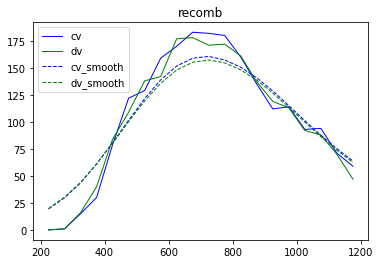

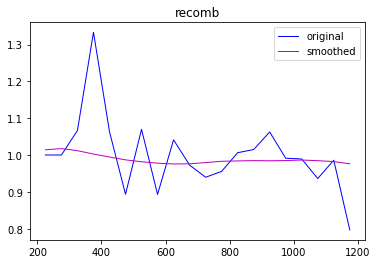

Enu_1m1p [2.00736618e-04 2.94833612e-04 1.37481223e-04 6.64352272e-06
 3.03789397e-05 1.76183456e-04 3.41699301e-04 5.02910843e-04
 6.06707394e-04 5.85520235e-04 4.32064007e-04 2.94842419e-04
 2.62906191e-04 2.34658657e-04 2.48248393e-04 2.30767515e-04
 1.89212455e-04 2.39123290e-04 3.26155748e-04 5.82177923e-04]
Enu_1m1p [0.00000000e+00 0.00000000e+00 4.44444444e-03 1.11111111e-01
 4.00576831e-03 1.13544746e-02 4.86749594e-03 1.14315098e-02
 1.69550173e-03 7.46513781e-04 3.65294047e-03 1.97530864e-03
 3.90625000e-05 2.19478738e-04 3.90625000e-03 7.69467528e-05
 1.15620303e-04 4.07424174e-03 1.98373339e-04 4.13674232e-02]


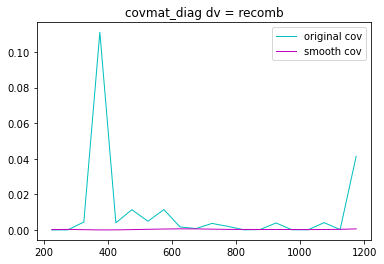

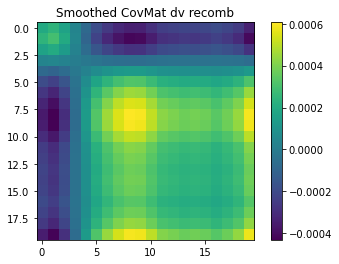

4
$$$$$$$$$$$$$$$$$$$$
[  2.000001   4.000001  20.000001  23.000001  55.000001  62.000001
  89.000001 157.000001 213.000001 277.000001 350.000001 306.000001
 312.000001 252.000001 225.000001 241.000001 165.000001 124.000001
 131.000001  93.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  400.276123    cv[1] = 1264.675878  rat = 0.240413
bwid = 285.401691
!!!!!!!!!!!!!!!!!!!!
[  3.000001   6.000001  28.000001  36.000001  62.000001  82.000001
  97.000001 160.000001 213.000001 297.000001 360.000001 305.000001
 310.000001 282.000001 230.000001 254.000001 179.000001 141.000001
 137.000001  95.000001]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


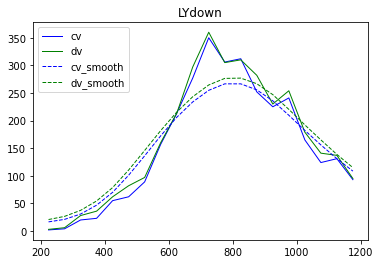

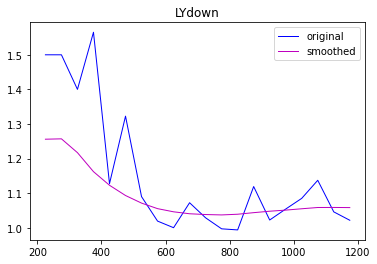

Enu_1m1p [0.05213767 0.05253551 0.0386889  0.02260394 0.01341487 0.00792753
 0.00472441 0.00287828 0.00201967 0.00156311 0.00139528 0.00131653
 0.00145878 0.00181307 0.00216726 0.0024633  0.00284312 0.00322321
 0.00323903 0.00319502]
Enu_1m1p [2.50000000e-01 2.50000000e-01 1.60000000e-01 3.19470699e-01
 1.61983471e-02 1.04058273e-01 8.07978791e-03 3.65126374e-04
 0.00000000e+00 5.21315278e-03 8.16326531e-04 1.06796531e-05
 4.10913872e-05 1.41723356e-02 4.93827160e-04 2.90972952e-03
 7.19926538e-03 1.87955255e-02 2.09777985e-03 4.62481212e-04]


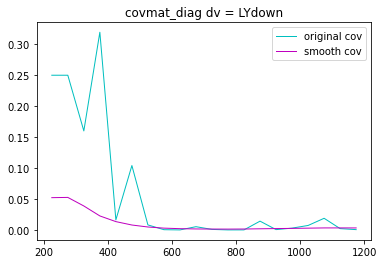

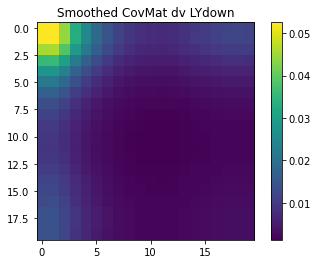

5
$$$$$$$$$$$$$$$$$$$$
[  2.000001   4.000001  20.000001  26.000001  55.000001  60.000001
  89.000001 154.000001 221.000001 300.000001 362.000001 311.000001
 341.000001 261.000001 244.000001 260.000001 165.000001 135.000001
 136.000001  95.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  400.276123    cv[1] = 1264.675878  rat = 0.240413
bwid = 283.606992
!!!!!!!!!!!!!!!!!!!!
[  3.000001   6.000001  26.000001  38.000001  66.000001  69.000001
 111.000001 159.000001 220.000001 322.000001 359.000001 323.000001
 344.000001 284.000001 257.000001 261.000001 185.000001 146.000001
 142.000001 106.000001]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


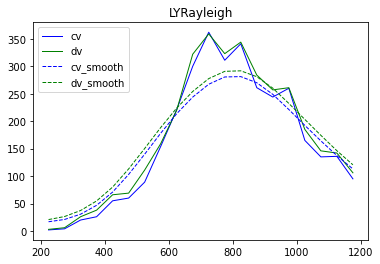

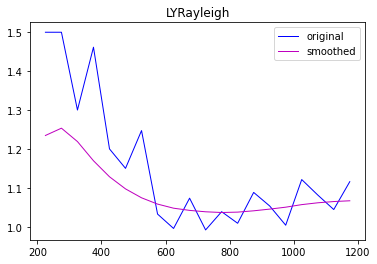

Enu_1m1p [0.04456108 0.05119659 0.03930423 0.02458169 0.0146024  0.00861561
 0.00513779 0.00319228 0.0021608  0.00168721 0.00141506 0.00128325
 0.00135367 0.0016025  0.00195614 0.00239723 0.00304712 0.00355633
 0.00392906 0.00416223]
Enu_1m1p [2.50000000e-01 2.50000000e-01 9.00000000e-02 2.13017751e-01
 4.00000000e-02 2.25000000e-02 6.11033960e-02 1.05414066e-03
 2.04746013e-05 5.37777778e-03 6.86792222e-05 1.48881835e-03
 7.73987152e-05 7.76559358e-03 2.83861865e-03 1.47928994e-05
 1.46923783e-02 6.63923182e-03 1.94636678e-03 1.34072022e-02]


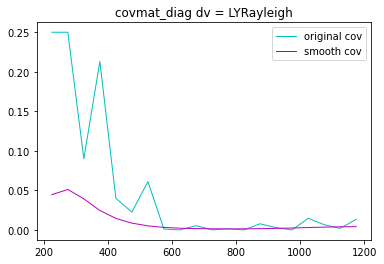

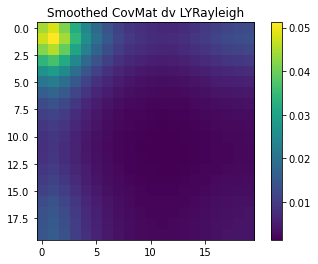

6
$$$$$$$$$$$$$$$$$$$$
[  1.000001   2.000001  15.000001  27.000001  70.000001 104.000001
 109.000001 137.000001 145.000001 166.000001 154.000001 163.000001
 136.000001 108.000001 106.000001 105.000001  85.000001  90.000001
  58.000001  52.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1037.957870    cv[1] = 561.236345  rat = 0.649051
bwid = 307.663830
!!!!!!!!!!!!!!!!!!!!
[1.00000100e+00 1.00000000e-06 1.00000010e+01 2.50000010e+01
 5.40000010e+01 1.01000001e+02 1.19000001e+02 1.34000001e+02
 1.53000001e+02 1.67000001e+02 1.49000001e+02 1.52000001e+02
 1.27000001e+02 1.09000001e+02 1.12000001e+02 1.09000001e+02
 8.60000010e+01 8.40000010e+01 5.40000010e+01 4.50000010e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


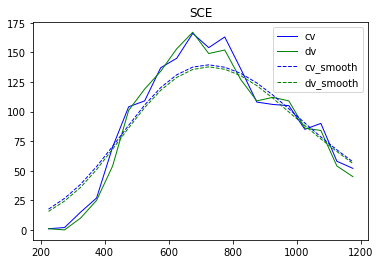

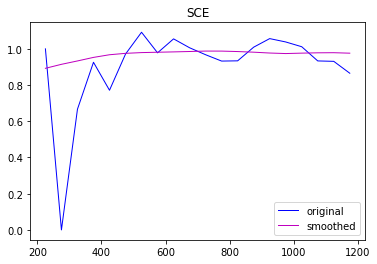

Enu_1m1p [0.01293539 0.00797752 0.00477987 0.00233757 0.0010946  0.00063156
 0.00043609 0.00035603 0.00028653 0.00021721 0.00015162 0.000156
 0.00022493 0.00034437 0.00054396 0.00069298 0.00057314 0.00048816
 0.00046088 0.00058555]
Enu_1m1p [0.00000000e+00 1.00000000e+00 1.11111111e-01 5.48696845e-03
 5.22448980e-02 8.32100592e-04 8.41679993e-03 4.79514092e-04
 3.04399524e-03 3.62897373e-05 1.05414066e-03 4.55417968e-03
 4.37932526e-03 8.57338820e-05 3.20398718e-03 1.45124717e-03
 1.38408304e-04 4.44444444e-03 4.75624257e-03 1.81213018e-02]


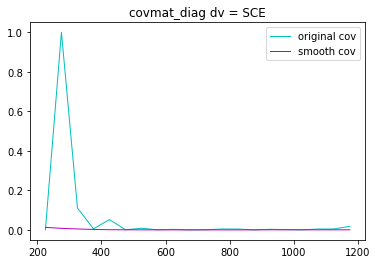

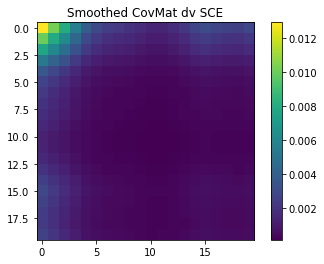

7
$$$$$$$$$$$$$$$$$$$$
[  2.000001   3.000001  12.000001  18.000001  42.000001  44.000001
  65.000001 128.000001 198.000001 265.000001 327.000001 295.000001
 299.000001 242.000001 226.000001 225.000001 153.000001 103.000001
 126.000001  83.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  343.230682    cv[1] = 665.768355  rat = 0.340169
bwid = 288.777110
!!!!!!!!!!!!!!!!!!!!
[  3.000001   4.000001  26.000001  41.000001  67.000001  59.000001
 100.000001 141.000001 206.000001 304.000001 333.000001 329.000001
 294.000001 263.000001 249.000001 232.000001 165.000001 132.000001
 134.000001  93.000001]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


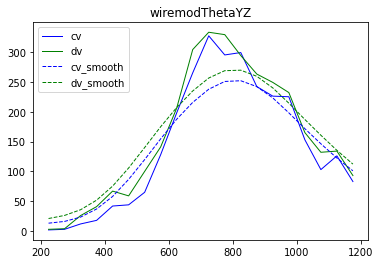

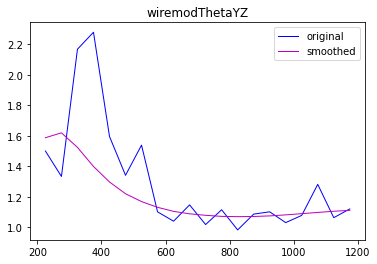

Enu_1m1p [0.21716999 0.23666882 0.18006719 0.1137447  0.06814361 0.03971551
 0.02438051 0.01524361 0.00991987 0.00724439 0.0057686  0.00483443
 0.00458508 0.00475154 0.00524373 0.00618617 0.00739939 0.00871584
 0.01004142 0.0111893 ]
Enu_1m1p [2.50000000e-01 1.11111111e-01 1.36111111e+00 1.63271605e+00
 3.54308390e-01 1.16219008e-01 2.89940828e-01 1.03149414e-02
 1.63248648e-03 2.16589534e-02 3.36671997e-04 1.32835392e-02
 2.79638930e-04 7.53022335e-03 1.03571149e-02 9.67901235e-04
 6.15148020e-03 7.92723160e-02 4.03124213e-03 1.45158949e-02]


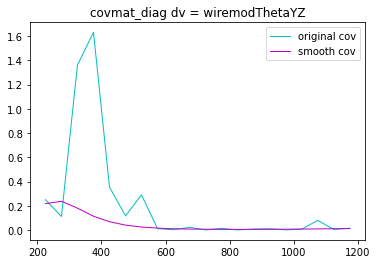

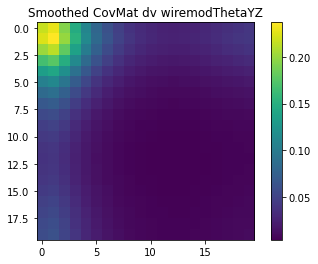

8
$$$$$$$$$$$$$$$$$$$$
[  2.000001   4.000001  11.000001  22.000001  40.000001  46.000001
  78.000001 124.000001 195.000001 263.000001 332.000001 285.000001
 296.000001 236.000001 204.000001 232.000001 154.000001 120.000001
 113.000001  92.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1264.675878    cv[1] = 343.230682  rat = 0.786536
bwid = 288.878364
!!!!!!!!!!!!!!!!!!!!
[  4.000001   3.000001  20.000001  36.000001  67.000001  72.000001
 108.000001 138.000001 224.000001 294.000001 337.000001 308.000001
 301.000001 278.000001 228.000001 256.000001 175.000001 148.000001
 133.000001 100.000001]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


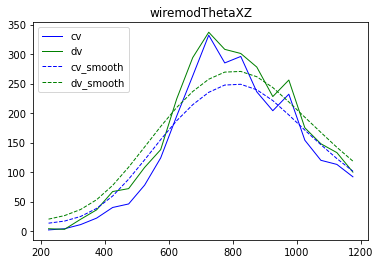

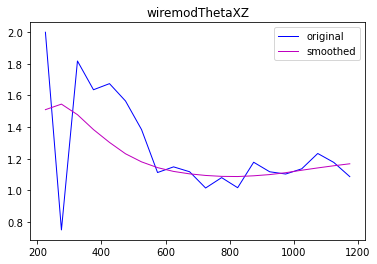

Enu_1m1p [0.17251038 0.19253752 0.15501898 0.10678736 0.07060017 0.04351575
 0.02756293 0.01809641 0.01283542 0.00988755 0.00815436 0.00721527
 0.0070513  0.00778662 0.00907474 0.01125229 0.01441569 0.01767395
 0.02097277 0.02423005]
Enu_1m1p [1.00000000e+00 6.25000000e-02 6.69421488e-01 4.04958678e-01
 4.55625000e-01 3.19470699e-01 1.47928994e-01 1.27471384e-02
 2.21170283e-02 1.38935072e-02 2.26810858e-04 6.51277316e-03
 2.85336012e-04 3.16719334e-02 1.38408304e-02 1.07015458e-02
 1.85950413e-02 5.44444444e-02 3.13258673e-02 7.56143667e-03]


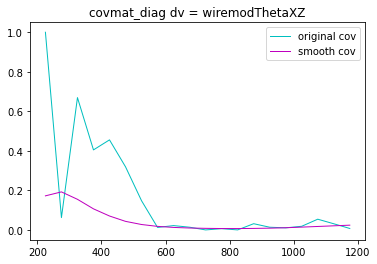

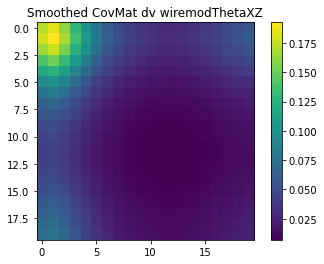

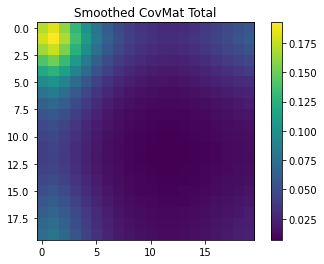

In [88]:
nbins = 20

if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

    
#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
for i in range(1):
    dist = varListSel['Enu_1m1p']
#    dist = varListSel['MPID_muon']

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))

    
    print(len(a_df_sys))
    for sysi in range(len(a_df_sys)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0')
        
        var_sys = myvardf.query(s_cuts)[dist.myname]
        var_cv = myvardf.query(s_cuts_cv)[dist.myname]
        # get cv and detvar lists and apply weights
        var_cv_list = np.array(var_cv.astype(float).values.tolist())
        var_sys_list = np.array(var_sys.astype(float).values.tolist())
        cv_weights = np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        sys_weights = np.array(myvardf.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())

        var_cv_list = var_cv_list * cv_weights

        var_sys_list = var_sys_list * sys_weights
        
        
        CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],nbin=nbins)


        
#        print(cv_weights)
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange)#,weights= cv_weights)#cv_scale)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange)#,weights=sys_weights)#cv_scale)
        bincenters = np.diff(binedges)/2 + binedges[:-1] 
        
        
#        hCV_smooth,binedges = np.histogram(CV_smooth,bins=nbins,range=dist.myrange)#,weights= cv_weights)#cv_scale)
#        hDV_smooth,_ = np.histogram(DV_smooth,bins=nbins,range=dist.myrange)#,weights=sys_weights)#cv_scale)
#        bincenters = np.diff(binedges)/2 + binedges[:-1] 

        
        
#        print(h0)
#        print(hCV)
#        print(bincenters)
        # polyfit
        #polyterms = 4
        #polyCV = np.polyfit(bincenters, hCV, polyterms)
        #fCV = np.poly1d(polyCV)    
        #poly0 = np.polyfit(bincenters, h0, polyterms)
        #f0 = np.poly1d(poly0)    
        #hCV = fCV(bincenters)
        #h0 = f0(bincenters)    
                
        #for i in range(nbins):
        #    for j in range(nbins):
        #        if hCV[i] > 0 and hCV[j] > 0:
        #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
        #        elif h0[i] > 0 and h0[j] > 0:
        #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(h0[i]*h0[j])
        cov_tmp = np.zeros((nbins,nbins))
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (hCV[i]*hCV[j])<1e-5:
                    cov_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
    #    print(dist.myname,cov.diagonal())
        
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth[i]*CV_smooth[j])<1e-5:
                    cov_smooth_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(DV_smooth[i]*CV_smooth[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        print(dist.myname,cov_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
        
        plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="c",label='original cov')
        plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
        plt.legend()
        plt.title('covmat_diag dv = %s'%names[sysi])
        plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        
        plt.show()
        
        plt.imshow(cov_smooth_tmp, interpolation='none')
        plt.colorbar(orientation='vertical')
        plt.title('Smoothed CovMat dv %s'%names[sysi])

        plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        plt.show()

        cov = cov+ cov_tmp
        cov_smooth = cov_smooth_tmp
    plt.imshow(cov_smooth, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.title('Smoothed CovMat Total')

    plt.savefig(plotfolder+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder+'/detsys_%s_%s_cov.csv'%(dist.myname, run),cov_smooth, delimiter=',')

# Run 1

In [91]:
run = 'run1'
f_scaleslist = []
s_detsyslist = []
names = ['recomb','LYdown','LYRayleigh','SCE']
for name in names:
    s_detsyslist.append(name)
'''
s_detsyslist.append('wiremodX')
#f_scaleslist.append(1.30915319237e+21) #POT

s_detsyslist.append('wiremodYZ')
#f_scaleslist.append(1.31097060608e+21) #POT

s_detsyslist.append('recomb')
f_scaleslist.append(6.3706245518e+20)

s_detsyslist.append('LYdown')
#f_scaleslist.append(1.21808316832e+21)

s_detsyslist.append('LYRayleigh')
#f_scaleslist.append(1.30830317061e+21)

s_detsyslist.append('SCE')
f_scaleslist.append(5.89862945464e+20)

s_detsyslist.append('wiremodThetaYZ')
#f_scaleslist.append(1.26402704519e+21)

s_detsyslist.append('wiremodThetaXZ')
#f_scaleslist.append(1.29697772584e+21)
'''

#df_cv = pd.read_parquet('../../data/pickles/detsys_CV_run3_nodupesMay1.parquet')
#scaleCV = 9.65858292241e+19 

a_df_sys = []

RSE = ['run','subrun','event']
i=0
for sys in s_detsyslist:
#    print('111')
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
    if i==0:
        print(df_sys)
    i+=1
    a_df_sys.append(df_sys)
#    print(df_sys.shape[0])

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))


       Proton_CosTheta  Lepton_CosTheta  MPID_pion  MPID_gamma  MPID_proton  \
0             0.802532        -0.096994   0.187252    0.038499     0.108660   
1             0.810423         0.667875   0.181796    0.041620     0.109664   
2             0.906053        -0.166905   0.000000    0.000000     0.000000   
3             0.887220        -0.066866   0.000000    0.000000     0.000000   
4             0.352836         0.794725   0.249479    0.041695     0.984136   
...                ...              ...        ...         ...          ...   
13984         0.829471        -0.499701   0.265967    0.336783     0.062380   
13985         0.761435         0.623140   0.655304    0.130664     0.656445   
13987         0.159422         0.610055   0.750041    0.141336     0.703256   
13988         0.981760        -0.294977   0.457573    0.059784     0.072199   
13989         0.974550        -0.239437   0.131326    0.025393     0.138463   

       MPID_muon  MPID_eminus  PassPrecuts1m1p   ru

4
0
$$$$$$$$$$$$$$$$$$$$
[  2.000001   9.000001  42.000001  68.000001  97.000001 118.000001
 123.000001 144.000001 169.000001 166.000001 170.000001 168.000001
 162.000001 136.000001 146.000001  97.000001 107.000001  71.000001
  66.000001  50.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  683.390130    cv[1] = 578.103973  rat = 0.541731
bwid = 301.519649
!!!!!!!!!!!!!!!!!!!!
[  3.000001   6.000001  39.000001  76.000001  92.000001 109.000001
 106.000001 136.000001 176.000001 167.000001 169.000001 153.000001
 147.000001 136.000001 135.000001 101.000001 106.000001  60.000001
  63.000001  50.000001]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


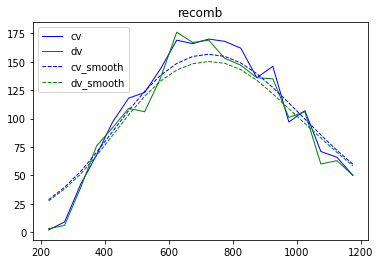

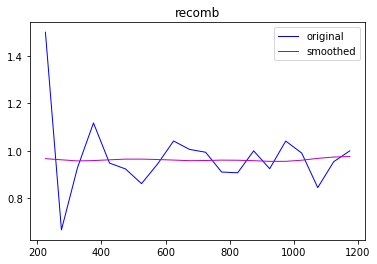

Enu_1m1p [0.00112779 0.00147944 0.00188638 0.00175782 0.00147993 0.00126333
 0.00125572 0.00139252 0.00157079 0.00179281 0.00173275 0.00159006
 0.00163334 0.0017946  0.00205888 0.00204393 0.00162483 0.00103536
 0.00070098 0.00059006]
Enu_1m1p [2.50000000e-01 1.11111111e-01 5.10204082e-03 1.38408304e-02
 2.65703050e-03 5.81729388e-03 1.91023861e-02 3.08641975e-03
 1.71562620e-03 3.62897373e-05 3.46020761e-05 7.97193878e-03
 8.57338820e-03 0.00000000e+00 5.67648715e-03 1.70049952e-03
 8.73438728e-05 2.40031740e-02 2.06611570e-03 0.00000000e+00]


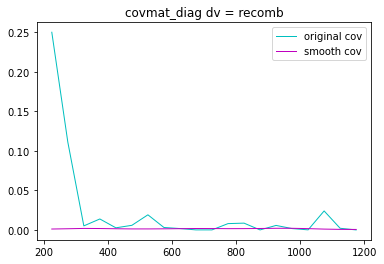

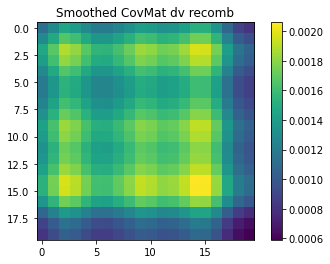

1
$$$$$$$$$$$$$$$$$$$$
[  4.000001  15.000001  64.000001  77.000001 113.000001 134.000001
 130.000001 156.000001 190.000001 183.000001 191.000001 178.000001
 183.000001 147.000001 150.000001 103.000001 108.000001  82.000001
  67.000001  52.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  903.975952    cv[1] = 683.390130  rat = 0.569482
bwid = 297.352502
!!!!!!!!!!!!!!!!!!!!
[  3.000001  14.000001  64.000001  86.000001 109.000001 137.000001
 131.000001 147.000001 205.000001 176.000001 193.000001 175.000001
 177.000001 150.000001 152.000001 105.000001 109.000001  71.000001
  67.000001  58.000001]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


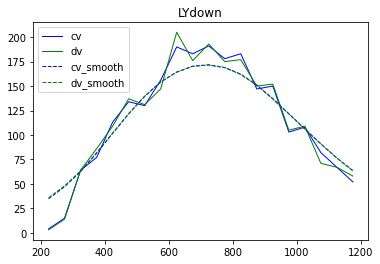

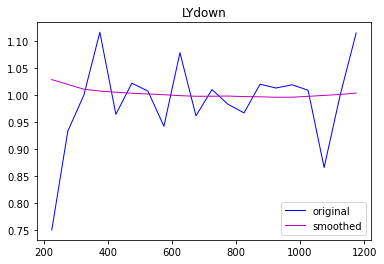

Enu_1m1p [8.19319370e-04 3.95029057e-04 1.22572912e-04 5.91448519e-05
 3.06324884e-05 1.33949447e-05 5.21472440e-06 9.11530087e-07
 5.89288600e-07 3.82106482e-06 3.54872749e-06 2.46402153e-06
 6.30669177e-06 8.65252608e-06 1.43904903e-05 1.33615714e-05
 4.52955625e-06 9.92300441e-08 1.99665101e-06 1.58137406e-05]
Enu_1m1p [6.25000000e-02 4.44444444e-03 0.00000000e+00 1.36616630e-02
 1.25303469e-03 5.01225217e-04 5.91715976e-05 3.32840237e-03
 6.23268698e-03 1.46316701e-03 1.09646117e-04 2.84055044e-04
 1.07497984e-03 4.16493128e-04 1.77777778e-04 3.77038364e-04
 8.57338820e-05 1.79952409e-02 0.00000000e+00 1.33136095e-02]


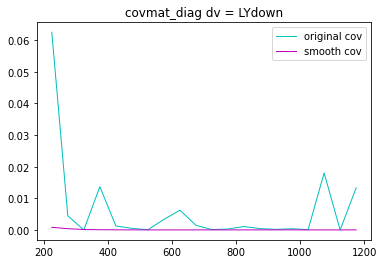

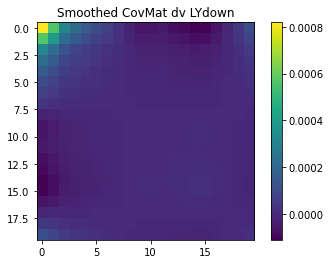

2
$$$$$$$$$$$$$$$$$$$$
[  4.000001  16.000001  59.000001  80.000001 115.000001 137.000001
 140.000001 170.000001 196.000001 189.000001 198.000001 196.000001
 187.000001 154.000001 159.000001 109.000001 114.000001  81.000001
  69.000001  59.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  903.975952    cv[1] = 683.390130  rat = 0.569482
bwid = 295.483631
!!!!!!!!!!!!!!!!!!!!
[  3.000001  19.000001  73.000001  92.000001 125.000001 156.000001
 157.000001 161.000001 227.000001 194.000001 220.000001 201.000001
 198.000001 173.000001 182.000001 117.000001 134.000001  81.000001
  74.000001  61.000001]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


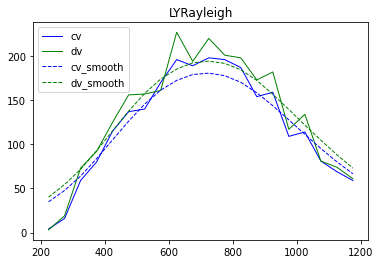

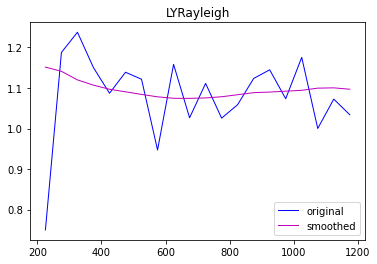

Enu_1m1p [0.01989759 0.01742266 0.01281523 0.01031833 0.00853848 0.00749879
 0.00651556 0.00565681 0.00516537 0.00513689 0.00528258 0.0056826
 0.00639826 0.00718094 0.0074013  0.00775227 0.00810304 0.00899871
 0.00912785 0.00854241]
Enu_1m1p [0.0625     0.03515625 0.05630566 0.0225     0.00756144 0.01923384
 0.0147449  0.00280277 0.02501562 0.00069987 0.01234568 0.00065077
 0.00346021 0.01522179 0.02092481 0.00538675 0.0307787  0.
 0.005251   0.0011491 ]


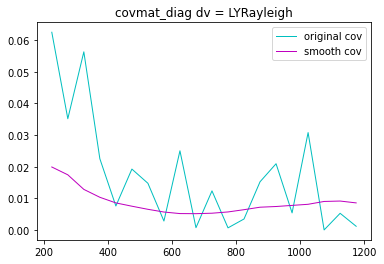

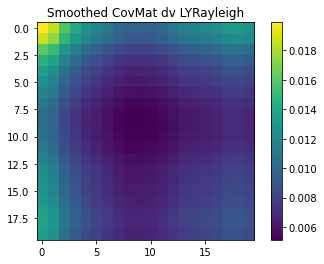

3
$$$$$$$$$$$$$$$$$$$$
[  2.000001   3.000001  42.000001  61.000001  86.000001 107.000001
 107.000001 141.000001 162.000001 152.000001 156.000001 163.000001
 159.000001 125.000001 121.000001  92.000001  87.000001  65.000001
  56.000001  43.000001]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  683.390130    cv[1] = 578.103973  rat = 0.541731
bwid = 305.405729
!!!!!!!!!!!!!!!!!!!!
[  1.000001   7.000001  39.000001  74.000001  86.000001  97.000001
  99.000001 150.000001 162.000001 155.000001 157.000001 167.000001
 156.000001 134.000001 116.000001  95.000001  88.000001  57.000001
  46.000001  44.000001]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-81-6388f0e5f185>:75: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-81-6388f0e5f185>:121: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-81-6388f0e5f185>:129: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


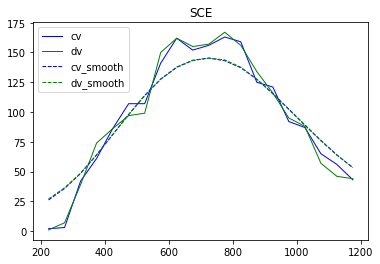

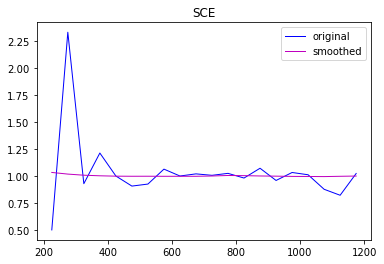

Enu_1m1p [1.05767374e-03 3.09164531e-04 5.49515204e-05 3.88765509e-06
 2.22405429e-06 5.71869335e-06 4.49426792e-06 7.33095747e-06
 6.79085968e-06 6.78466987e-06 1.17983858e-11 2.41518478e-05
 1.14720907e-05 8.65971727e-08 2.07583200e-06 1.32215721e-05
 1.81925351e-05 2.90769460e-05 7.19287226e-06 1.31959678e-07]
Enu_1m1p [2.50000000e-01 1.77777778e+00 5.10204082e-03 4.54178984e-02
 0.00000000e+00 8.73438728e-03 5.59000786e-03 4.07424174e-03
 0.00000000e+00 3.89542936e-04 4.10913872e-05 6.02205578e-04
 3.55998576e-04 5.18400000e-03 1.70753364e-03 1.06332703e-03
 1.32117849e-04 1.51479290e-02 3.18877551e-02 5.40832883e-04]


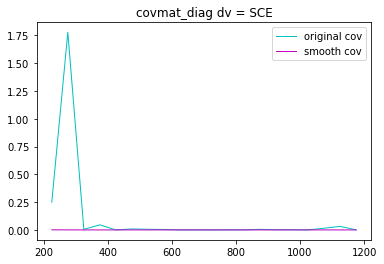

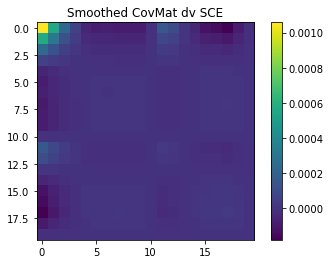

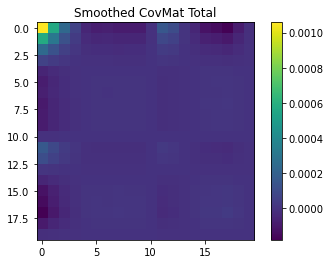

In [92]:
nbins = 20
if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

    
#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
for i in range(1):
    dist = varListSel['Enu_1m1p']
#    dist = varListSel['MPID_muon']

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))

    
    print(len(a_df_sys))
    for sysi in range(len(a_df_sys)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0')
        
        var_sys = myvardf.query(s_cuts)[dist.myname]
        var_cv = myvardf.query(s_cuts_cv)[dist.myname]
        # get cv and detvar lists and apply weights
        var_cv_list = np.array(var_cv.astype(float).values.tolist())
        var_sys_list = np.array(var_sys.astype(float).values.tolist())
        cv_weights = np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        sys_weights = np.array(myvardf.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())

        var_cv_list = var_cv_list * cv_weights

        var_sys_list = var_sys_list * sys_weights
        
        
        CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],nbin=nbins)


        
#        print(cv_weights)
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange)#,weights= cv_weights)#cv_scale)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange)#,weights=sys_weights)#cv_scale)
        bincenters = np.diff(binedges)/2 + binedges[:-1] 
        
        
#        hCV_smooth,binedges = np.histogram(CV_smooth,bins=nbins,range=dist.myrange)#,weights= cv_weights)#cv_scale)
#        hDV_smooth,_ = np.histogram(DV_smooth,bins=nbins,range=dist.myrange)#,weights=sys_weights)#cv_scale)
#        bincenters = np.diff(binedges)/2 + binedges[:-1] 

        
        
#        print(h0)
#        print(hCV)
#        print(bincenters)
        # polyfit
        #polyterms = 4
        #polyCV = np.polyfit(bincenters, hCV, polyterms)
        #fCV = np.poly1d(polyCV)    
        #poly0 = np.polyfit(bincenters, h0, polyterms)
        #f0 = np.poly1d(poly0)    
        #hCV = fCV(bincenters)
        #h0 = f0(bincenters)    
                
        #for i in range(nbins):
        #    for j in range(nbins):
        #        if hCV[i] > 0 and hCV[j] > 0:
        #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
        #        elif h0[i] > 0 and h0[j] > 0:
        #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(h0[i]*h0[j])
        cov_tmp = np.zeros((nbins,nbins))
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (hCV[i]*hCV[j])<1e-5:
                    cov_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
    #    print(dist.myname,cov.diagonal())
        
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth[i]*CV_smooth[j])<1e-5:
                    cov_smooth_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(DV_smooth[i]*CV_smooth[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        print(dist.myname,cov_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
        
        plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="c",label='original cov')
        plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
        plt.legend()
        plt.title('covmat_diag dv = %s'%names[sysi])
        plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        
        plt.show()
        
        plt.imshow(cov_smooth_tmp, interpolation='none')
        plt.colorbar(orientation='vertical')
        plt.title('Smoothed CovMat dv %s'%names[sysi])

        plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        plt.show()

        cov = cov+ cov_tmp
        cov_smooth = cov_smooth_tmp
    plt.imshow(cov_smooth, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.title('Smoothed CovMat Total')

    plt.savefig(plotfolder+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder+'/detsys_%s_%s_cov.csv'%(dist.myname, run),cov_smooth, delimiter=',')

In [31]:
dvar = varListSel['Xreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

for sysi in range(len(a_df_sys)):
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
          
    hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
    h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
    bincenters = np.diff(binedges)/2 + binedges[:-1]
        
    # polyfit
    polyterms = 4
    polyCV = np.polyfit(bincenters, hCV, polyterms)
    fCV = np.poly1d(polyCV)    
    poly0 = np.polyfit(bincenters, h0, polyterms)
    f0 = np.poly1d(poly0)    
    
    hCV_fit = fCV(bincenters)
    h0_fit = f0(bincenters)
    
    #Savitsky Golay
    window_length = 7
    little_poly_t = 3
    hCV_sgfit = signal.savgol_filter(hCV, window_length, little_poly_t)
    h0_sgfit = signal.savgol_filter(h0, window_length, little_poly_t)
        
    
    fig,ax = plt.subplots(figsize=(16,11))
        
    dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
    #plt.plot(dvarLinspace,fCV(dvarLinspace),label='CV Fit (%f)'%chi2_cv)
    #plt.plot(dvarLinspace,f0(dvarLinspace),label='Variation Fit (%f)'%chi2_h0)
    #plt.scatter(bincenters,hCV_sgfit,label='CV SG Fit (%f)'%chi2_cv_sgfit,marker='o',s=120)
    #plt.scatter(bincenters,h0_sgfit,label='Variation SG Fit (%f)'%chi2_h0_sgfit,marker='o')
    ax.set_title(s_detsyslist[sysi],fontsize=30)
    ax.set_xlabel(dvar.mylabel,fontsize=20)
    ax.legend(fontsize=15)
    
    
    for i in range(nbins):
        for j in range(nbins):
            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
            #cov[i][j] += (h0_fit[i]-hCV_fit[i])*(h0_fit[j]-hCV_fit[j])/(hCV_fit[i]*hCV_fit[j])
            #cov[i][j] += (h0_sgfit[i]-hCV_sgfit[i])*(h0_sgfit[j]-hCV_sgfit[j])/(hCV_sgfit[i]*hCV_sgfit[j])
    flatsys += np.power(h0.sum()-hCV.sum(),2)/float(h0.sum()*hCV.sum())
            
            
print('flat sys:',np.sqrt(flatsys),flatsys)
print(dvar.myname,cov[0][0],cov[7][7])
X, Y = np.meshgrid(binedges,binedges)

fig,ax = plt.subplots(figsize=(10,10))
crat = ax.pcolormesh(X, Y,cov.T,cmap='cool')#,vmin=-2,vmax=3)
cbar = fig.colorbar(crat)
ax.set_title('Fractional Covariance Matrix',fontsize=30)
ax.set_ylabel(dvar.mylabel,fontsize=20)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#np.savetxt('/home/dcianci/Downloads/detsys_enu_sgfit_cov.csv',cov,delimiter=',')

#cov = np.zeros((nbins,nbins))
#for i in range(nbins):
#    cov[i][i] = flatsys
#np.savetxt('/home/dcianci/Downloads/detsys_enu_flat_cov.csv',cov,delimiter=',')



NameError: name 'a_overlap_sys' is not defined

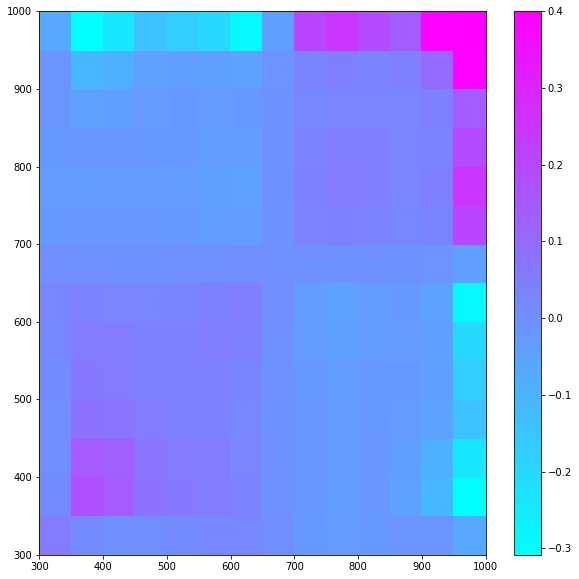

In [138]:
X, Y = np.meshgrid(binedges,binedges)

fig,ax = plt.subplots(figsize=(10,10))
crat = ax.pcolormesh(X, Y,cov,cmap='cool',vmax=.4)
cbar = fig.colorbar(crat)


In [59]:
list(df_sys)

['Proton_CosTheta_cv',
 'Lepton_CosTheta_cv',
 'Proton_CosTheta',
 'Lepton_CosTheta',
 'bkgBDT_run3_cv',
 'bkgBDT_run3',
 'run',
 'subrun',
 'event',
 'vtxid',
 'Xreco',
 'Yreco',
 'Zreco',
 'InFiducial',
 'AnyReco',
 'NTracks',
 'N5cmTracks',
 'PassSimpleCuts',
 'PassShowerReco',
 'PassSecondShower',
 'FailedBoost',
 'FailedBoost_1m1p',
 'FailedBoost_1e1p',
 'Good3DReco',
 'Eta',
 'OpenAng',
 'Thetas',
 'Phis',
 'QCorrectionFactorVertex',
 'ChargeNearTrunk',
 'LongTrackLen',
 'ShortTrackLen',
 'MaxShrFrac',
 'MinShrFrac',
 'CCQEEnergyShift_1m1p',
 'Enu_1m1p',
 'PhiT_1m1p',
 'AlphaT_1m1p',
 'PT_1m1p',
 'PTRat_1m1p',
 'BjX_1m1p',
 'BjY_1m1p',
 'Q2_1m1p',
 'Sph_1m1p',
 'PzEnu_1m1p',
 'Q0_1m1p',
 'Q3_1m1p',
 'OpenAngB_1m1p',
 'ThetasB_1m1p',
 'PhisB_1m1p',
 'PhiTB_1m1p',
 'AlphaTB_1m1p',
 'PTB_1m1p',
 'BjXB_1m1p',
 'BjYB_1m1p',
 'Q2B_1m1p',
 'SphB_1m1p',
 'CCQEEnergyShift_1e1p',
 'Enu_1e1p',
 'PhiT_1e1p',
 'AlphaT_1e1p',
 'PT_1e1p',
 'PTRat_1e1p',
 'BjX_1e1p',
 'BjY_1e1p',
 'Q2_1e1p',
 'S

wiremodX
polyfit degrees: 0 7.19169553120931
sg window_length 7 degrees: 10 7.116065343221028
wiremodYZ
polyfit degrees: 0 14.652654012044271
sg window_length 7 degrees: 10 14.726931889851889
wiremoddEdx
polyfit degrees: 0 8.301823933919271
sg window_length 1 degrees: 10 8.199064095815023
LYdown
polyfit degrees: 0 5.715118010838826
sg window_length 9 degrees: 10 5.694827159245809
SCE
polyfit degrees: 0 14.362505276997885
sg window_length 9 degrees: 10 14.273023923238119
wiremodThetaYZ
polyfit degrees: 0 6.244710286458333
sg window_length 11 degrees: 10 6.2069681485493975
wiremodThetaXZ
polyfit degrees: 0 10.961923917134603
sg window_length 3 degrees: 10 10.499676068623861
flat sys: 0.08959695735944827 0.008027614768070792


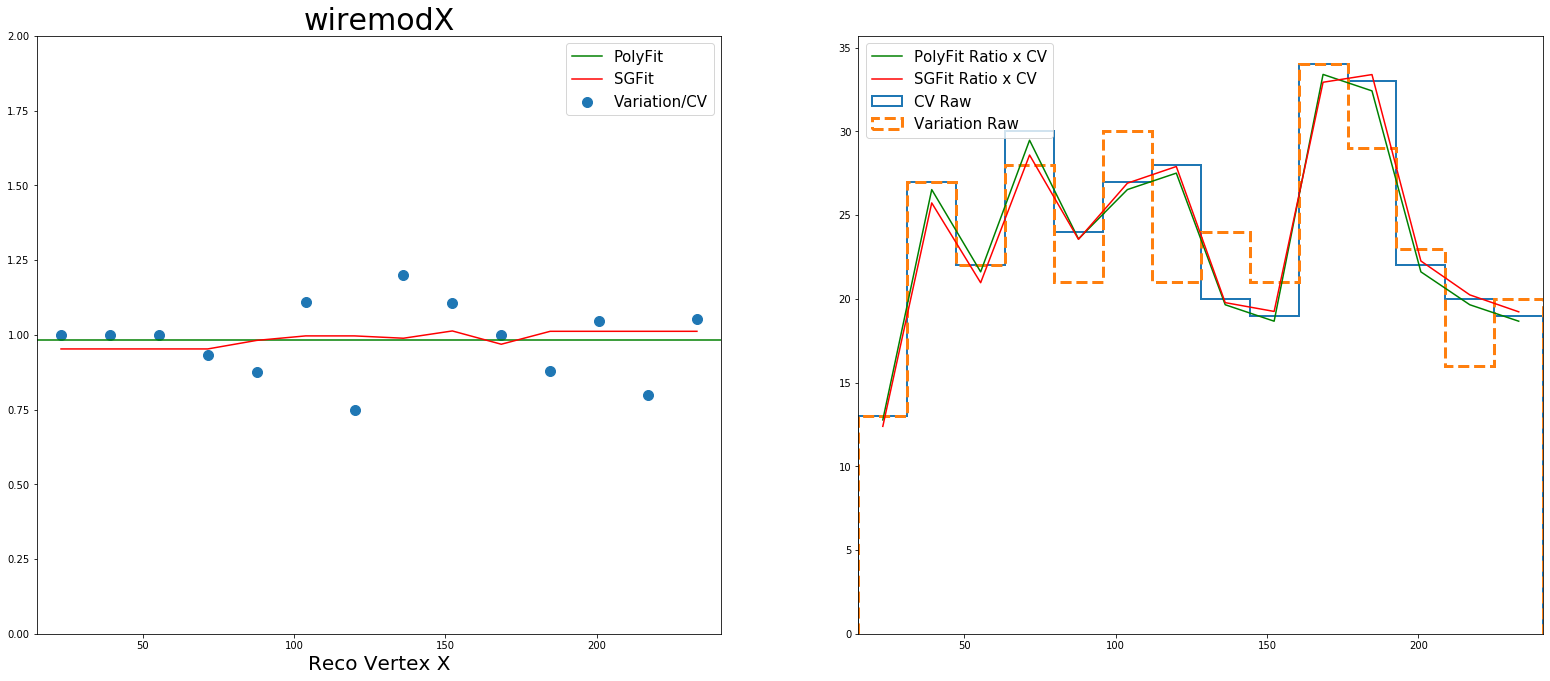

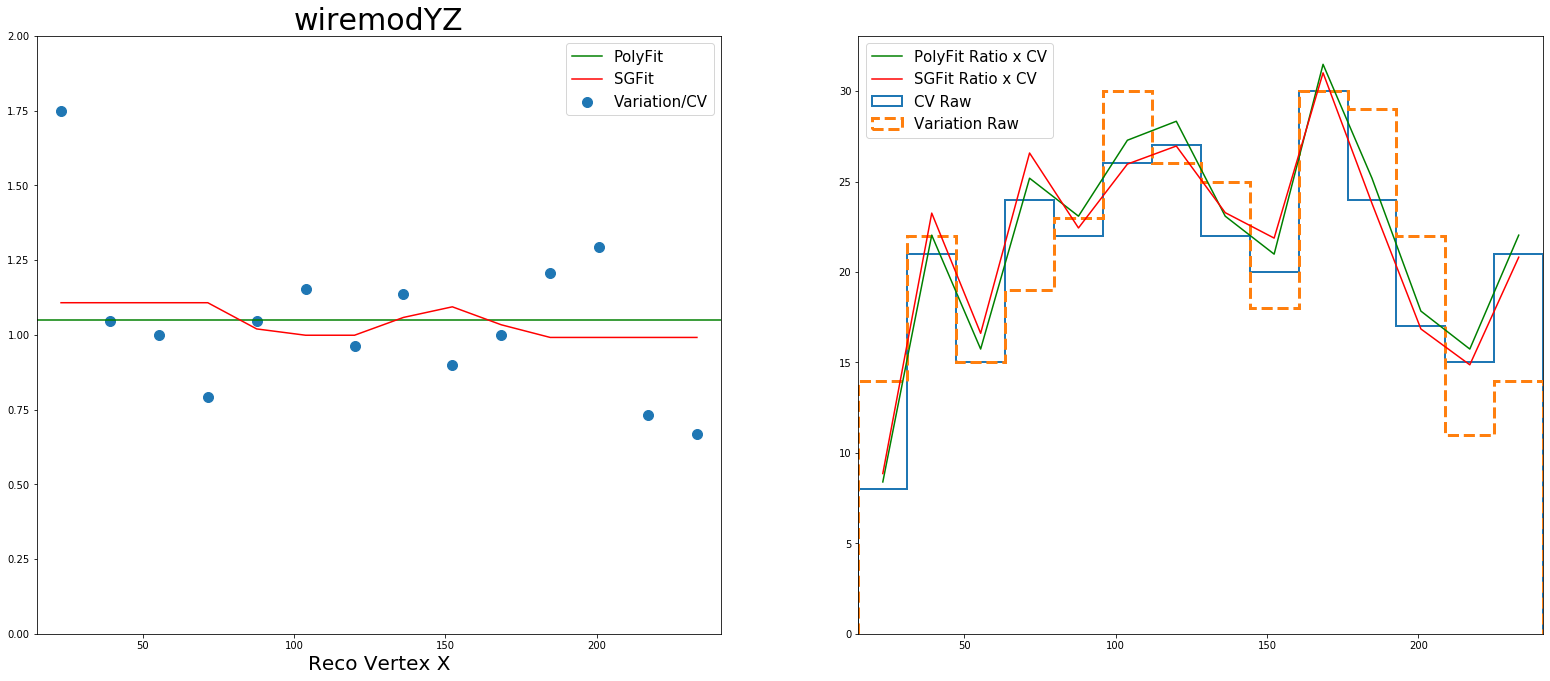

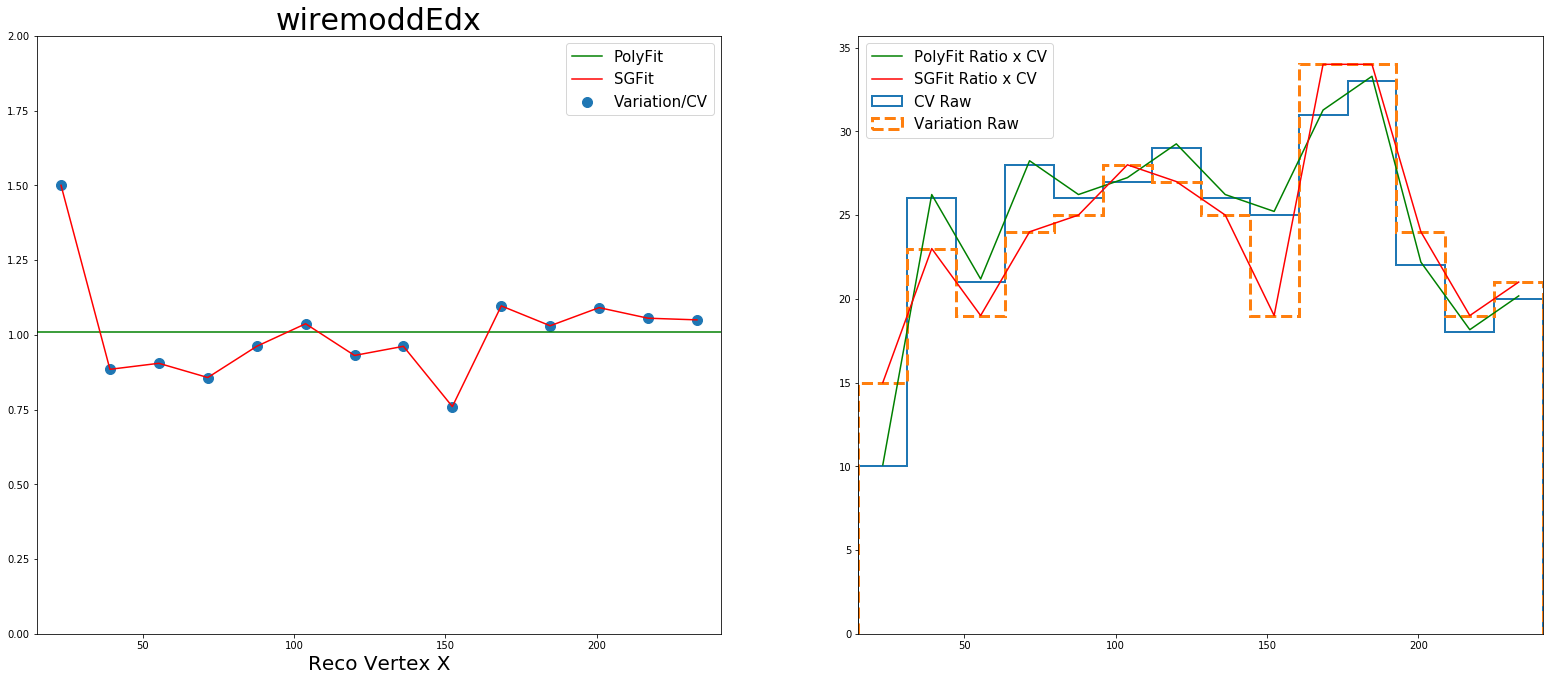

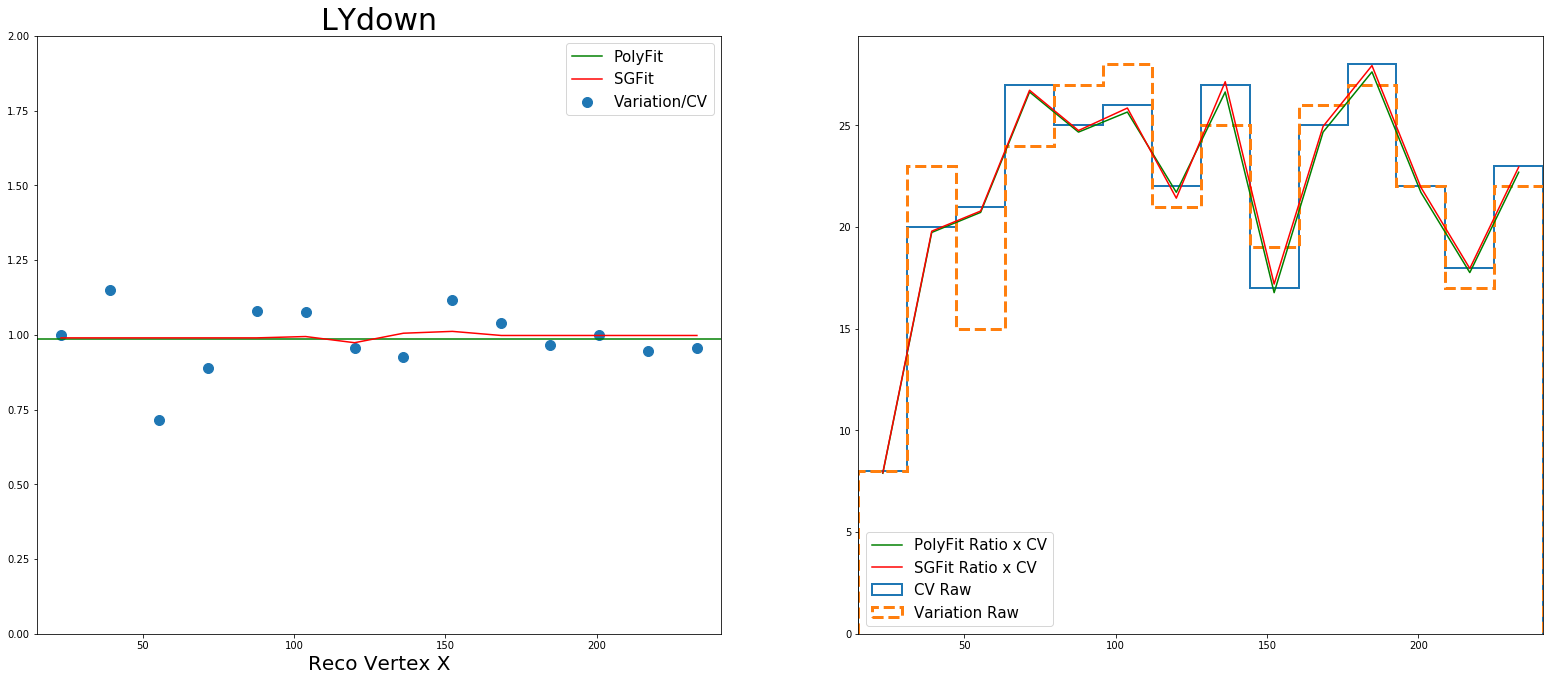

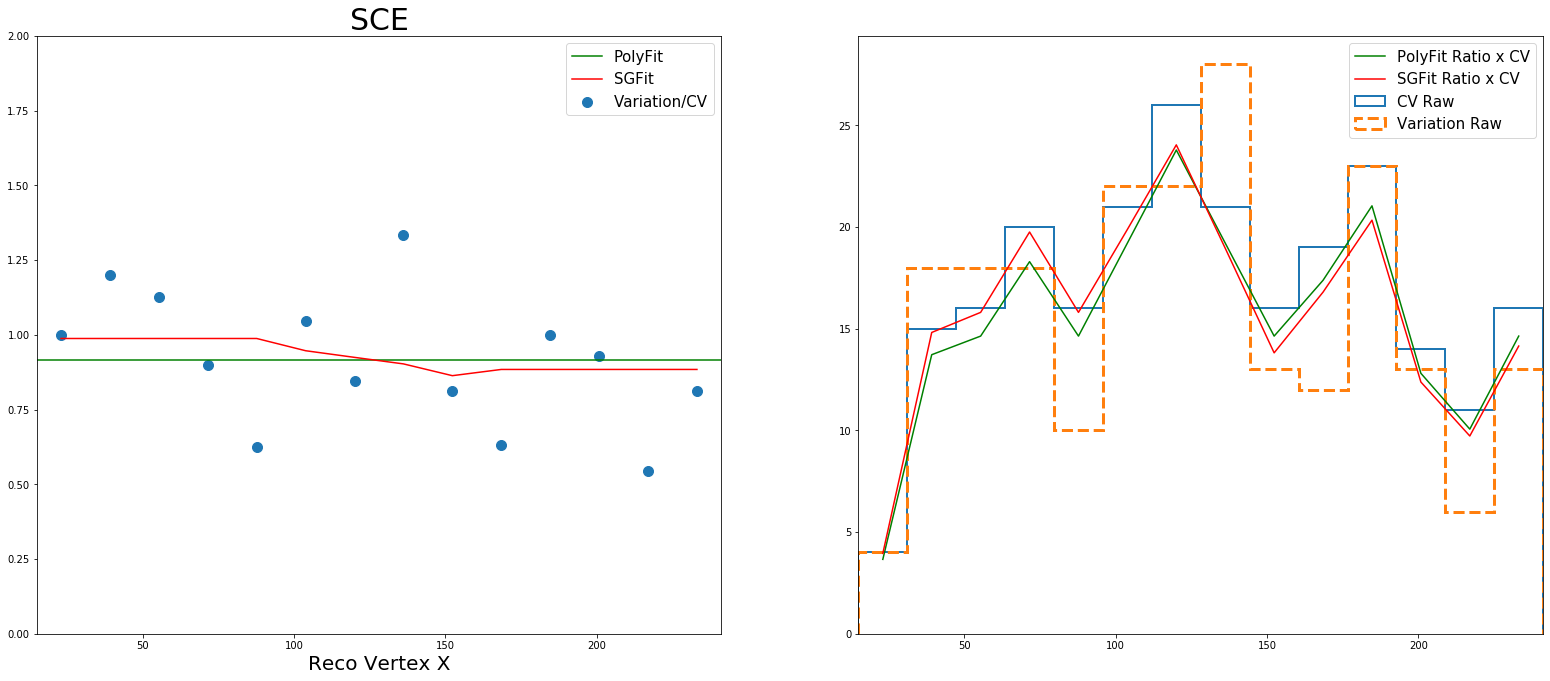

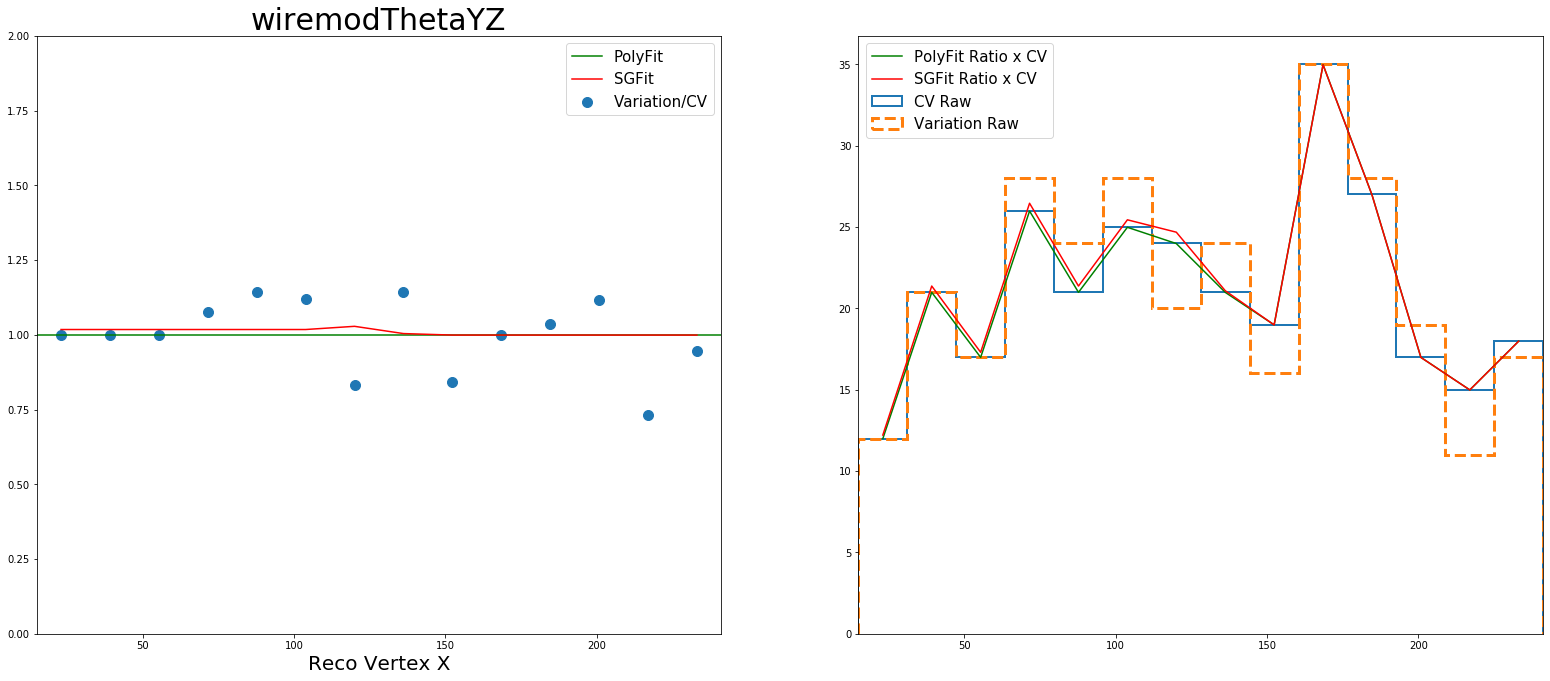

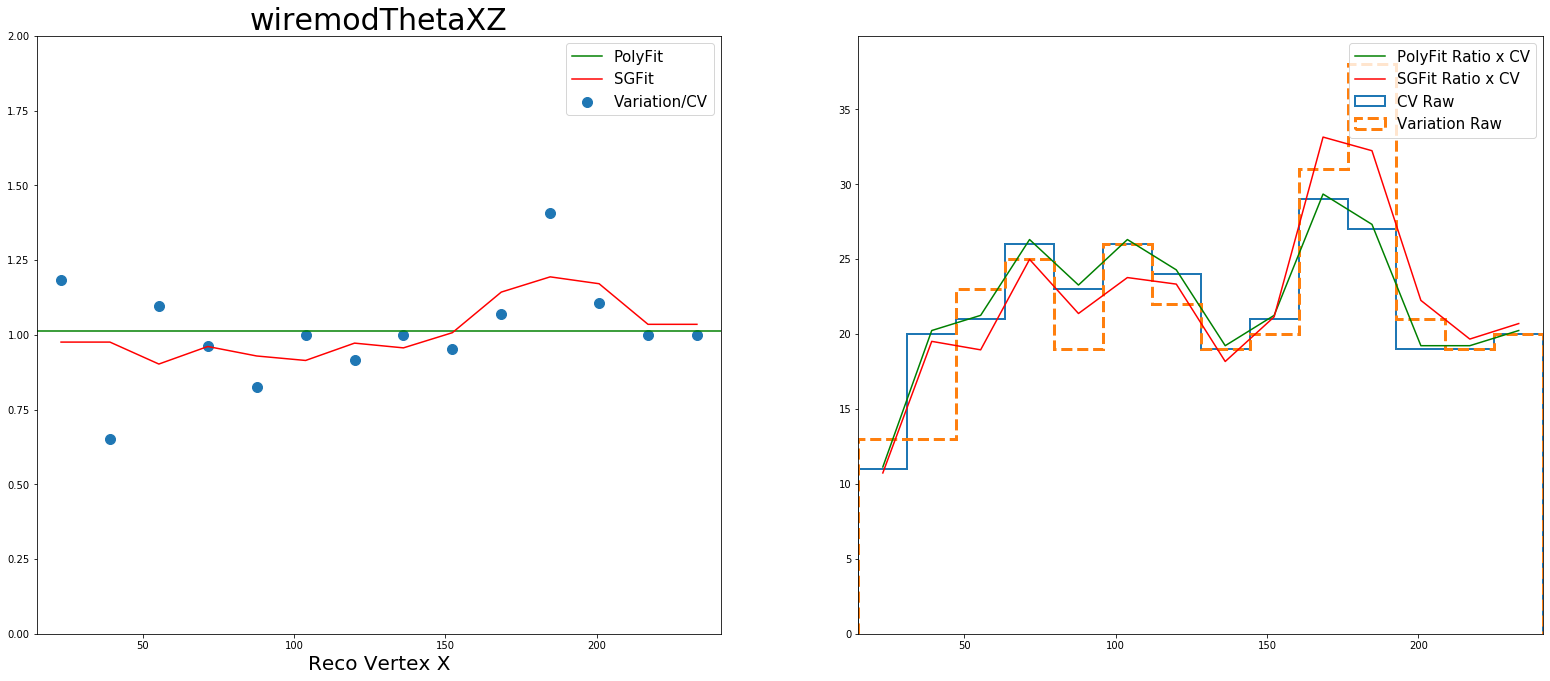

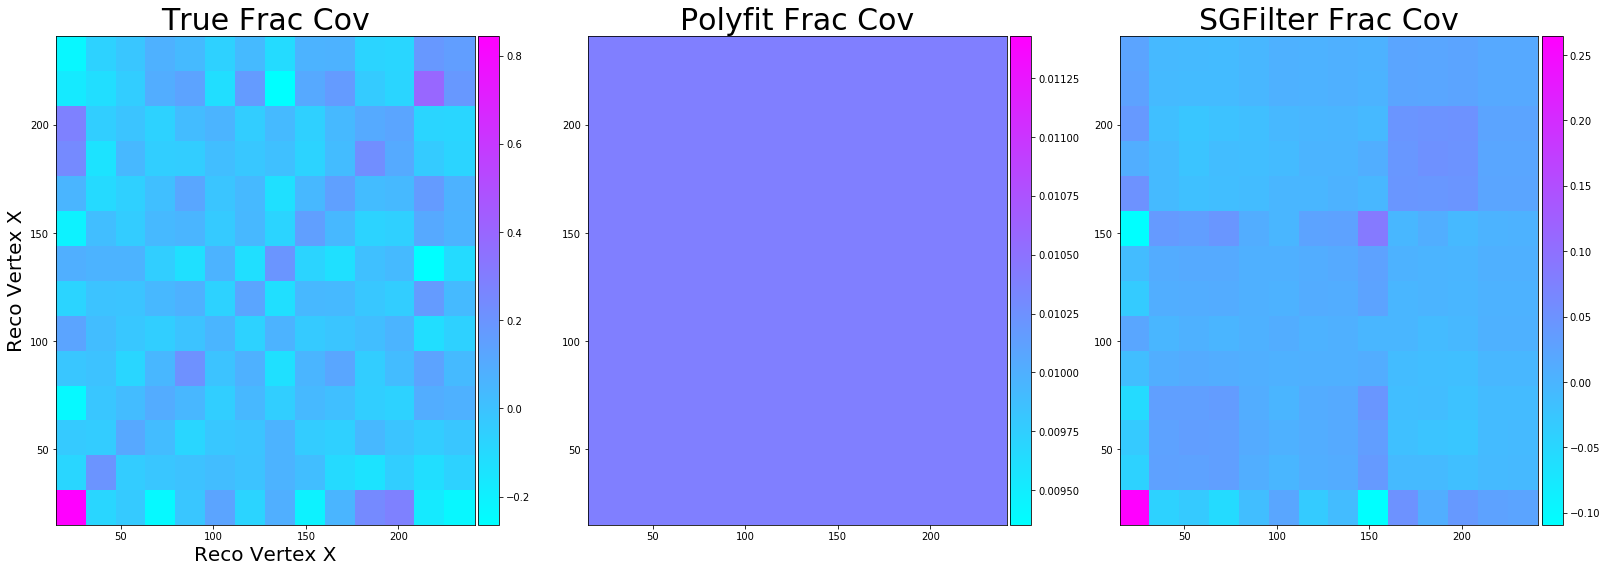

In [153]:
# The same thing with ratios

dvar = varListSel['Xreco']
nbins = 14
cov_tru = np.zeros((nbins,nbins))
cov_poly = np.zeros((nbins,nbins))
cov_sg = np.zeros((nbins,nbins))
flatsys = 0.0

for sysi in range(len(a_df_sys)):
    print(s_detsyslist[sysi])
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
          
    hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
    h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
    bincenters = np.diff(binedges)/2 + binedges[:-1]

    truRat = np.true_divide(h0,hCV,out=np.ones_like(bincenters),where=hCV!=0)
      
    # get polyfit degs
    aics = []
    degs = []
    for deg in range(min(nbins-2,int(nbins/2))):
        params = deg + 1
        polyRat = np.polyfit(bincenters, truRat, deg)
        fRat = np.poly1d(polyRat)
    
        # now calculate chi2 for fit
        yerr_rat = np.true_divide(np.sqrt(fRat(bincenters)*hCV),hCV,out=np.zeros_like(bincenters),where=hCV!=0)
        chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
        aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
        aics.append(aic)
        degs.append(deg)
      
    polyterms = degs[np.argmin(aics)]
    print('polyfit degrees:',polyterms,aics[np.argmin(aics)])  
    polyRat = np.polyfit(bincenters, np.true_divide(h0,hCV,where=hCV!=0), polyterms)
    fRat = np.poly1d(polyRat) 
    h0_fit = fRat(bincenters)*hCV
    
    # get sg degs
    aics = []
    degs = []
    wls = []
    for window_length in range(1,nbins-1,2):
        for deg in range(window_length):   
            params = deg + 1
            sgRat = signal.savgol_filter(np.true_divide(h0,hCV,where=hCV!=0), window_length, deg)
            
            # now calculate chi2 for fit
            yerr_rat = np.true_divide(np.sqrt(sgRat*hCV),hCV,out=np.zeros_like(bincenters),where=hCV!=0)
             
            chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat,out=np.zeros_like(bincenters),where=yerr_rat!=0),2).sum()
            aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
            aics.append(aic)
            degs.append(deg)
            wls.append(window_length)
           
    #Savitsky Golay
    window_length = wls[np.argmin(aics)]
    little_poly_t = degs[np.argmin(aics)]
    print('sg window_length',window_length,'degrees:',deg,aics[np.argmin(aics)])
    sgRat = signal.savgol_filter(np.true_divide(h0,hCV,where=hCV!=0), window_length, little_poly_t)
    h0_sgfit = sgRat*hCV
        
    fig,ax = plt.subplots(figsize=(27,11))    
    gs = gridspec.GridSpec(1, 2)
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    
    dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
    ax0.scatter(bincenters,np.true_divide(h0,hCV,where=hCV!=0),label='Variation/CV',s=100)
    ax0.plot(dvarLinspace,fRat(dvarLinspace),label='PolyFit',color='green')
    ax0.plot(bincenters,sgRat,label='SGFit',color='red')
    
    ax0.set_title(s_detsyslist[sysi],fontsize=30)
    ax0.set_xlabel(dvar.mylabel,fontsize=20)
    ax0.legend(fontsize=15)
    
    ax1.hist(var_cv,nbins,range=dvar.myrange,histtype='step',linewidth=2,label='CV Raw')
    ax1.hist(var_sys,nbins,range=dvar.myrange,histtype='step',linewidth=3,linestyle='--',label='Variation Raw')
    ax1.plot(bincenters,h0_fit,label='PolyFit Ratio x CV',c='green')
    ax1.plot(bincenters,h0_sgfit,label='SGFit Ratio x CV',c='red')
    ax1.legend(fontsize=15)
    ax1.set_xlim(dvar.myrange)
    
    for i in range(nbins):
        for j in range(nbins):
            cov_tru[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
            cov_poly[i][j] += (h0_fit[i]-hCV[i])*(h0_fit[j]-hCV[j])/(hCV[i]*hCV[j])
            cov_sg[i][j] += (h0_sgfit[i]-hCV[i])*(h0_sgfit[j]-hCV[j])/(hCV[i]*hCV[j])
    flatsys += np.power(h0.sum()-hCV.sum(),2)/float(h0.sum()*hCV.sum())
    
    ax0.set_xlim(dvar.myrange)
    ax0.set_ylim(0,2)
    
fig,ax = plt.subplots(figsize=(27,9))
gs = gridspec.GridSpec(1, 3)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

X, Y = np.meshgrid(binedges,binedges)

crat_tru = ax0.pcolormesh(X, Y,cov_tru,cmap='cool')#,vmin=-2,vmax=3)
crat_poly = ax1.pcolormesh(X, Y,cov_poly,cmap='cool')#,vmin=-2,vmax=3)
crat_sg = ax2.pcolormesh(X, Y,cov_sg,cmap='cool')#,vmin=-2,vmax=3)

divider0 = make_axes_locatable(ax0)
divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)

cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)

cbar = fig.colorbar(crat_tru,cax0)
cbar = fig.colorbar(crat_poly,cax1)
cbar = fig.colorbar(crat_sg,cax2)

ax0.set_title('True Frac Cov',fontsize=30)
ax1.set_title('Polyfit Frac Cov',fontsize=30)
ax2.set_title('SGFilter Frac Cov',fontsize=30)

ax0.set_ylabel(dvar.mylabel,fontsize=20)
ax0.set_xlabel(dvar.mylabel,fontsize=20)

print('flat sys:',np.sqrt(flatsys),flatsys)
np.savetxt('/home/dcianci/Downloads/detsys_%s_nom_cov.csv'%dvar.myname,cov_tru,delimiter=',')
np.savetxt('/home/dcianci/Downloads/detsys_%s_polyfit_cov.csv'%dvar.myname,cov_poly,delimiter=',')
np.savetxt('/home/dcianci/Downloads/detsys_%s_sg_cov.csv'%dvar.myname,cov_sg,delimiter=',')

cov_flat = np.zeros((nbins,nbins))
for i in range(nbins):
    cov_flat[i][i] = flatsys
np.savetxt('/home/dcianci/Downloads/detsys_%s_flat_cov.csv'%dvar.myname,cov_flat,delimiter=',')


## Let's find a good fit

testneg,testzero: [3.57341932 5.14984534 4.6486157  5.42841363 4.85532075 5.14984534
 5.2443458  4.43228117 4.3200533  5.77898761 5.69336824 4.6486157
 4.43228117 4.3200533 ] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 0 chi2: 4.858361287099476 AIC: 7.191694620432809
testneg,testzero: [3.58460323 5.16348664 4.65869297 5.43756843 4.86117103 5.1535693
 5.24561031 4.43121234 4.31692725 5.77201615 5.68375055 4.63851669
 4.42050956 4.30649029] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 1 chi2: 4.85521127016807 AIC: 9.94612036107716
testneg,testzero: [3.5606019  5.14488139 4.6538984  5.44316405 4.87367964 5.17214315
 5.2672318  4.44949474 4.33253077 5.7869404  5.6896391  4.63370125
 4.40441123 4.27729037] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 2 chi2: 4.8453018282503555 AIC: 13.245301828250357
testneg,testzero: [3.59961408 5.14921655 4.6303984  5.4024315  4.83840441 5.14579844
 5.25763767 4.45759211 4.35454975 5.82872384 5.7321843  4.6571843
 4.40065667 4.229296

/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0, 2)

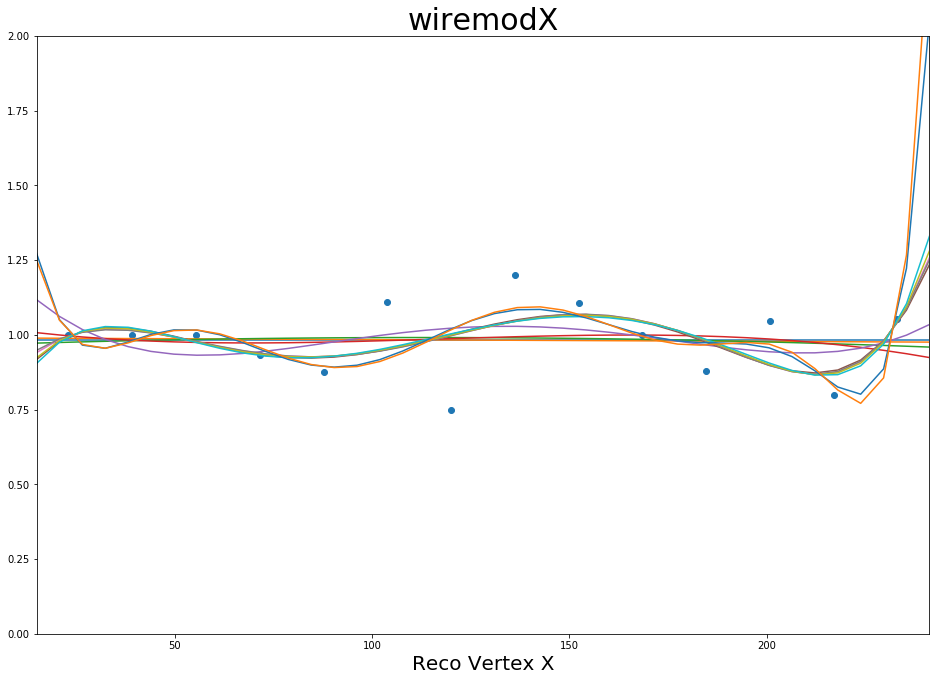

In [117]:
# The same thing with ratios

dvar = varListSel['Xreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

sysi = 0

myvardf = a_overlap_sys[sysi].query(s_cuts)
myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
var_sys = myvardf[dvar.myname]
var_cv = myvarcv[dvar.myname+'_cv']
          
hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
bincenters = np.diff(binedges)/2 + binedges[:-1]
truRat = np.true_divide(h0,hCV)

fig,ax = plt.subplots(figsize=(16,11))    
dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
plt.scatter(bincenters,np.true_divide(h0,hCV),label='Variation/CV')

# polyfit
aics = []
degs = []
for deg in range(nbins-2):
        
    params = deg + 1
    polyRat = np.polyfit(bincenters, truRat, deg)
    fRat = np.poly1d(polyRat)
    h0_fit = fRat(bincenters)*hCV
    
    # now calculate chi2 for fit
    print('testneg,testzero:',np.sqrt(h0_fit),hCV)
    yerr_rat = np.true_divide(np.sqrt(h0_fit),hCV)
    chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
    aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
    print('degree:',deg,'chi2:',chi2_fit,'AIC:',aic)
    plt.plot(dvarLinspace,fRat(dvarLinspace),label='PolyFit (%i)'%polyterms)
    aics.append(aic)
    degs.append(deg)
    

print(degs[np.argmin(aics)])

ax.set_title(s_detsyslist[sysi],fontsize=30)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#ax.legend(fontsize=15)
      
ax.set_xlim(dvar.myrange)
ax.set_ylim(0,2)


window_length 1 degree: 0 chi2: 9.263592560412054 AIC: 11.596925893745388
window_length 3 degree: 0 chi2: 8.873041047947478 AIC: 11.206374381280812
window_length 3 degree: 1 chi2: 8.625229458693235 AIC: 13.716138549602327
window_length 3 degree: 2 chi2: 9.26359256041205 AIC: 17.66359256041205
window_length 5 degree: 0 chi2: 8.878586485910798 AIC: 11.211919819244132
window_length 5 degree: 1 chi2: 8.618203262808063 AIC: 13.709112353717153
window_length 5 degree: 2 chi2: 8.762149528124052 AIC: 17.16214952812405
window_length 5 degree: 3 chi2: 8.827626905939193 AIC: 21.272071350383634
window_length 5 degree: 4 chi2: 9.26359256041205 AIC: 26.76359256041205
window_length 7 degree: 0 chi2: 8.958226898628284 AIC: 11.291560231961618
window_length 7 degree: 1 chi2: 8.568924482314452 AIC: 13.659833573223544
window_length 7 degree: 2 chi2: 8.704847251526996 AIC: 17.104847251526994
window_length 7 degree: 3 chi2: 8.82672819886712 AIC: 21.271172643311566
window_length 7 degree: 4 chi2: 8.8252614464

(0, 2)

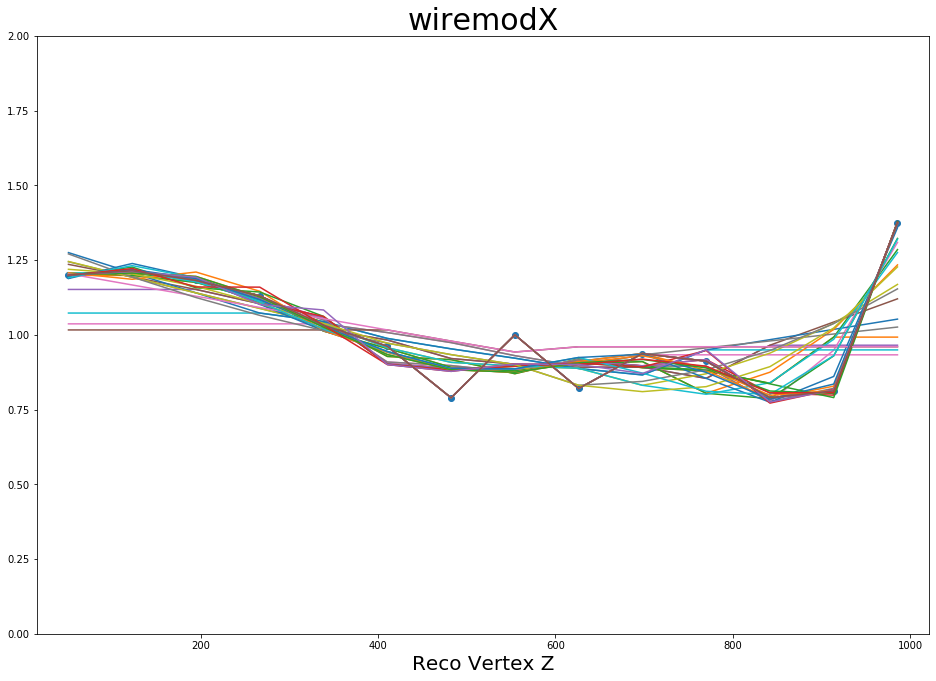

In [77]:
# The same thing with ratios

dvar = varListSel['Zreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

sysi = 0

myvardf = a_overlap_sys[sysi].query(s_cuts)
myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
var_sys = myvardf[dvar.myname]
var_cv = myvarcv[dvar.myname+'_cv']
          
hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
bincenters = np.diff(binedges)/2 + binedges[:-1]
truRat = np.true_divide(h0,hCV)

fig,ax = plt.subplots(figsize=(16,11))    
dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
plt.scatter(bincenters,np.true_divide(h0,hCV),label='Variation/CV')

# polyfit
for window_length in range(1,nbins-1,2):
    for deg in range(window_length):
        
        params = deg + 1
        sgRat = signal.savgol_filter(np.true_divide(h0,hCV), window_length, deg)
        h0_fit = sgRat*hCV
     
         # now calculate chi2 for fit
        yerr_rat = np.true_divide(np.sqrt(h0_fit),hCV)
        chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
        aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
        print('window_length',window_length,'degree:',deg,'chi2:',chi2_fit,'AIC:',aic)
        plt.plot(bincenters,sgRat,label='Sigfit (%i)'%polyterms)
    
ax.set_title(s_detsyslist[sysi],fontsize=30)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#ax.legend(fontsize=15)
      
ax.set_xlim(dvar.myrange)
ax.set_ylim(0,2)

In [ ]:


if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:
    
    fig,ax = plt.subplots(figsize=(16,11))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, .75])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    hSys =  []
    
    for i in range(len(s_detsyslist)):
        var_sys = a_df_sys[i].query(s_cuts)[dist.myname]
        sys_scale = np.ones(len(var_sys))*totalscale/f_scaleslist[i]
        h0,_ = np.histogram(var_sys,range=dist.myrange,bins=dumpbins,weights=sys_scale)
        h1,_,_ = ax0.hist(var_sys,range=dist.myrange,bins=dumpbins,histtype='step',label=s_detsyslist[i]+' (%i)'%h0.sum(),linewidth=2,weights=sys_scale)
        hSys.append(h1)
    
    var_cv = df_cv.query(s_cuts)[dist.myname]
    cv_scale = np.ones(len(var_cv))*totalscale/scaleCV
    h0,_ = np.histogram(var_cv,range=dist.myrange,bins=dumpbins,weights=cv_scale)
    hCV,binedges,_ = ax0.hist(var_cv,range=dist.myrange,bins=dumpbins,histtype='step',label='CV (%i)'%h0.sum(),linewidth=3,color='black',linestyle='--',weights=cv_scale)       
    
    ax0.set_ylabel('Events in 5e19 POT',fontsize=20)
    ax0.set_xlabel(dist.mylabel,fontsize=25)
    ax0.set_title('BNB Overlay w/ Detsys',fontsize=15)
    ax0.set_xlim(dist.myrange)
    ax1.set_xlim(dist.myrange)
    ax1.set_ylim(0,2.5)
    ax0.legend(fontsize=15)
    
    for i in range(len(hSys)):
        ydots = np.true_divide(hSys[i],hCV,where=hCV!=0)
        xdots = binedges[:-1] + (binedges[1]-binedges[0])/float(len(hSys)) * i
        ax1.scatter(xdots,ydots)
    
    ax1.axhline(1,linestyle=':',color='maroon')
    
    for j in range(len(hCV)):
        ax1.axvline(binedges[j+1],linestyle=':',color='gray') 
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

## Smearing

In [51]:
dumphole = 'DetSysSmear'
dumpfolder = '../PlotDumps'

dumphole = '%s/%s'%(dumpfolder,dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:

    fig,ax = plt.subplots(figsize=(16,11))
    binwidth = (dvar.myrange[1]-dvar.myrange[0])/float(14)
    myrange = (-3*binwidth,3*binwidth)
    nbins = 15

    for sysi in range(len(a_df_sys)):
        myvardf = a_overlap_sys[sysi].query(s_cuts)
        myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
        var_sys = myvardf[dvar.myname]
        var_cv = myvarcv[dvar.myname+'_cv']
        
        h0,binedges,_ = plt.hist((var_cv-var_sys),bins=nbins,range=myrange,histtype='step',label=s_detsyslist[sysi],linewidth=3) 
    
    ax.axvline(binwidth,label='+1 Binwidth',linestyle=':')
    ax.axvline(-binwidth,label='-1 Binwidth',linestyle=':')
    ax.set_title('(CV - Detsys)',fontsize=30)
    ax.set_xlabel(r'$\Delta$'+dvar.mylabel,fontsize=20)
    ax.legend(fontsize=25)
    plt.savefig(dumphole+'/'+dvar.myname+'.png')
    plt.close(fig)
    

NameError: name 'varlistSel' is not defined

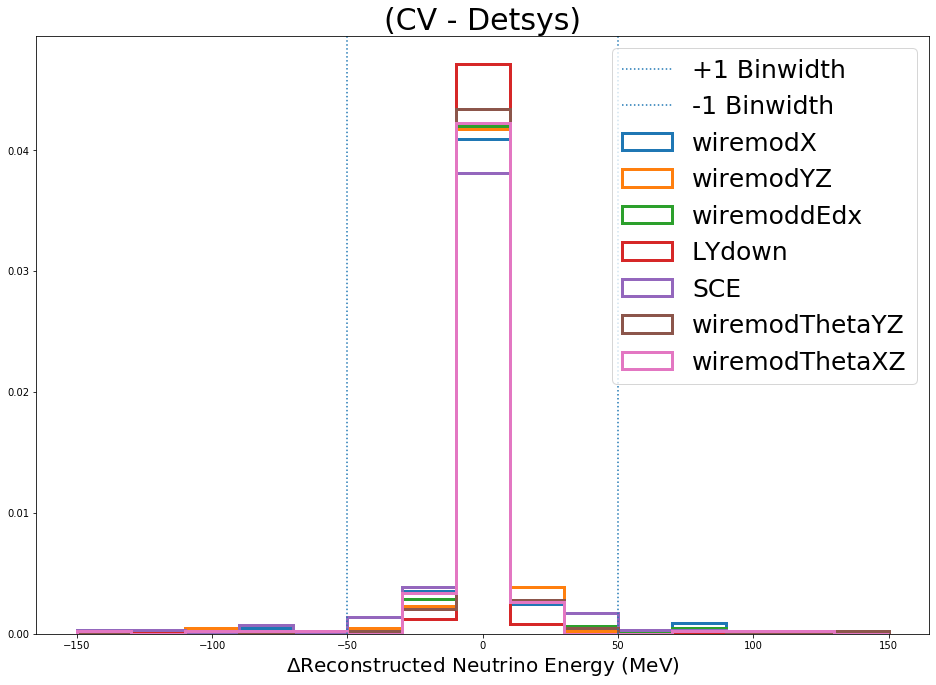

In [150]:
dvar = varListSel['Enu_1m1p']

fig,ax = plt.subplots(figsize=(16,11))
binwidth = (dvar.myrange[1]-dvar.myrange[0])/float(14)
myrange = (-3*binwidth,3*binwidth)
nbins = 15

for sysi in range(len(a_df_sys)):
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
        
    h0,binedges,_ = plt.hist((var_cv-var_sys),bins=nbins,range=myrange,histtype='step',label=s_detsyslist[sysi],linewidth=3,density=1) 
    
ax.axvline(binwidth,label='+1 Binwidth',linestyle=':')
ax.axvline(-binwidth,label='-1 Binwidth',linestyle=':')
ax.set_title('(CV - Detsys)',fontsize=30)
ax.set_xlabel(r'$\Delta$'+dvar.mylabel,fontsize=20)
ax.legend(fontsize=25)

## Extras

In [83]:
dumpbins = 18
dumphole = '/home/dcianci/Downloads/detsys_may18_presel' # where are we dumping these?

if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:
    
    fig,ax = plt.subplots(figsize=(16,11))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, .75])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    hSys =  []
    
    for i in range(len(s_detsyslist)):
        var_sys = a_df_sys[i][dist.myname]
        sys_scale = np.ones(len(var_sys))*totalscale/f_scaleslist[i]
        h0,_ = np.histogram(var_sys,range=dist.myrange,bins=dumpbins,weights=sys_scale)
        h1,_,_ = ax0.hist(var_sys,range=dist.myrange,bins=dumpbins,histtype='step',label=s_detsyslist[i]+' (%.4f)'%h0.sum(),linewidth=2,weights=sys_scale)
        hSys.append(h1)
    
    var_cv = df_cv[dist.myname]
    cv_scale = np.ones(len(var_cv))*totalscale/scaleCV
    h0,_ = np.histogram(var_cv,range=dist.myrange,bins=dumpbins,weights=cv_scale)
    hCV,binedges,_ = ax0.hist(var_cv,range=dist.myrange,bins=dumpbins,histtype='step',label='CV (%.4f)'%h0.sum(),linewidth=3,color='black',linestyle='--',weights=cv_scale)
    
    ax0.set_ylabel('Events in 5e19 POT',fontsize=20)
    ax0.set_xlabel(dist.mylabel,fontsize=25)
    ax0.set_title('BNB Overlay w/ Detsys',fontsize=15)
    ax0.set_xlim(dist.myrange)
    ax1.set_xlim(dist.myrange)
    ax0.legend(fontsize=15)
    ax1.set_ylim(0,2.5)
    
    for i in range(len(hSys)):
        ydots = np.true_divide(hSys[i],hCV,where=hCV!=0)
        xdots = binedges[:-1] + (binedges[1]-binedges[0])/float(len(hSys)) * i
        ax1.scatter(xdots,ydots)
    
    ax1.axhline(1,linestyle=':',color='maroon')
    
    for j in range(len(hCV)):
        ax1.axvline(binedges[j+1],linestyle=':',color='gray') 
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

/home/dcianci/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dcianci/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
